# Prediction on Alibaba Cloud 2021 Cluster Data (w/ Keras Sequential)

Data

In [1]:
import pandas as pd
import numpy as np
df  = pd.read_csv("bigdata.csv")
dataset = np.array(df)
X = dataset[:, 3] # memory column
Y = dataset[:, 2] # cpu column
ID = dataset[:, 1] # node id column
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

Plotting the Data

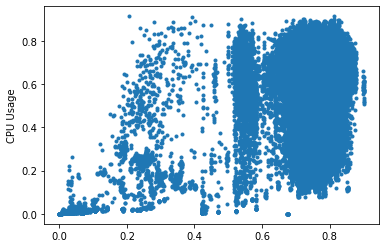

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".")
plt.ylabel("CPU Usage")
plt.show()

Splitting the Data

In [3]:
from sklearn.model_selection import train_test_split

X = X.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Model : Keras Sequential with Rectified Linear Unit

In [4]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(None, X_train.shape[1])),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'SGD',
    metrics = ['mean_squared_error']
)

hist = model.fit(X_train, Y_train, 
                    epochs=10, verbose=1)

Epoch 1/10


2022-10-27 12:20:43.060614: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4219/4219 [==============================] - 3s 662us/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 2/10
4219/4219 [==============================] - 3s 678us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 3/10
4219/4219 [==============================] - 3s 701us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 4/10
4219/4219 [==============================] - 3s 622us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 5/10
4219/4219 [==============================] - 3s 613us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 6/10
4219/4219 [==============================] - 3s 658us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 7/10
4219/4219 [==============================] - 3s 612us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 8/10
4219/4219 [==============================] - 3s 612us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 9/10
4219/4219 [==============================] - 3s 655us/step - loss: 0.0198 - mean_squared

Prediction

In [5]:
Y_predict = model.predict(X_test).ravel()

Plotting the Predicted CPU Usage

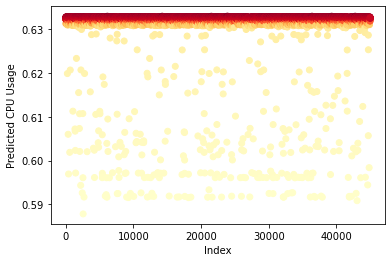

In [6]:
plt.scatter(x=list(range(0, 45000)), y=Y_predict, c=X_test, cmap="YlOrRd")
plt.ylabel("Predicted CPU Usage")
plt.xlabel("Index")
plt.show()

MSE

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_predict)

0.01950154

Node ID and their Predicted CPU Usage

In [8]:
listY_test = list(Y_test)
listID = list(ID)
listY_predict = list(Y_predict)
tmp = []
# list of node id's in the test set
for i in listY_test:
    tmp.append(listY_test.index(i))
listY_test_id = []
for i in tmp:
    listY_test_id.append(listID[i])
    
# printing node id's and their predicted cpu usage
for i, j in zip(listY_test_id, listY_predict):
    print("Node ID =", i, "Predicted CPU Usage =", j)

Node ID = b1f98eed32dcd1bcb575af5f483ab12c3b7981b7d25c6595a54de6376c381c22 Predicted CPU Usage = 0.63242525
Node ID = 50f7c53d8692424fbe603c78b4e61c19276a7823df7a85f1767762054213dec7 Predicted CPU Usage = 0.6325772
Node ID = 02d27a3d3bfa1b60f607ef05c14d2e37ef2fdb271e32e79ed483235a095c8010 Predicted CPU Usage = 0.6326052
Node ID = b5952eee6a521b0f2b7ae15b122cc5a3714aba85cd5614ed8bf71b6f2736779f Predicted CPU Usage = 0.6324279
Node ID = 2acfac3d84cd4aa3bb5d243069d18b8b2bcc8dfb84527c524ce3979287c6f056 Predicted CPU Usage = 0.6327092
Node ID = 5cbd9ac26a81e868dfadf945054eb6bd8703131c99c536f8e1bc32fc257b09a9 Predicted CPU Usage = 0.6325469
Node ID = f66333e4613351b2dd89e7ffdb604cb4016f34c4084ec3b8351c047d576699bc Predicted CPU Usage = 0.63255167
Node ID = 1946291c5b695555122161e1bd00a4e955b32520ff3bf742cd9f52e630fb0d1d Predicted CPU Usage = 0.63253284
Node ID = 2d36938c8e73138710f776269a1146eab7c2f6be4f6f4a0b224b915ca295ad51 Predicted CPU Usage = 0.6312926
Node ID = bb23c55fca977cfd860f6a92

Node ID = c827bf12cfb97a30f9bf928764437ae7685841c6481cdcd820d53bbc57b2fa28 Predicted CPU Usage = 0.6325063
Node ID = 2edbc375d6450377c1debc6f39dd3b014462a8b9d9d775cb300697d1fcbb7b0f Predicted CPU Usage = 0.63254464
Node ID = 8862d25ba9644f277643661a282856429cf839d9709db7c31d13f2dcdee1de71 Predicted CPU Usage = 0.6324911
Node ID = ea91852da4823c161dac5ffdc3505c67091a3c7f0680c63e6d4cfd48459545f5 Predicted CPU Usage = 0.63246787
Node ID = 343e11699c46a49fb2eb2953e045b12f8341ca810777fb43e44196a29d834a65 Predicted CPU Usage = 0.63260055
Node ID = 3323af6be89424d53ccf128c1106bfb0abf1d3f15fb53296ee97102ddac474b4 Predicted CPU Usage = 0.6325412
Node ID = 6f906712da068f06a87a2654b2dfb2a5a97ecc1b4c7958e2a7c0c099a70a24a1 Predicted CPU Usage = 0.6326615
Node ID = ad379ca314c5d106521391148ff261b2cd2c2922d7ddecfcd358bd8b95f51028 Predicted CPU Usage = 0.63257223
Node ID = ba4da5d6656e8c7892efa4303a6a37d82863a5c6d55ec30e581eeb905bc1b427 Predicted CPU Usage = 0.63255614
Node ID = 55d6c55b673a63b4c9ae99

Node ID = f66a4cb836abd3795e134f94919426a4699f96555b044d1216d95a20d7bc28b1 Predicted CPU Usage = 0.6325002
Node ID = 216d1a7cdcd53b8087c0281bef3f98f28e5e0e5a3c9eeb319371ead8f3f40c13 Predicted CPU Usage = 0.63258004
Node ID = 5bcd35492d56f9ca8d9c9dd98bc2783406a05326f36fb4cfc966c143e64f0f39 Predicted CPU Usage = 0.6325955
Node ID = b3074a46013df875fde08660718e832a8b914dfdb3f62643a8e3cf07a300dcda Predicted CPU Usage = 0.63255537
Node ID = cce79f14edcf1f352526399d3408f7319f074f896e4f1854010e8f112c0eb87d Predicted CPU Usage = 0.63266015
Node ID = 538f76ba3c886b571f58436071c92d4e912b027b5e5b4a9cfc55e863f2e9a754 Predicted CPU Usage = 0.6325099
Node ID = bd380ebecf790394952e280c80dc2ed76c911406bc127a814c394a579f32b42d Predicted CPU Usage = 0.6325494
Node ID = 2d3a59c11034bad7430a549dbcb6beedf7abcd6c737a6d5ec4f24caf619e99af Predicted CPU Usage = 0.6324754
Node ID = 1defe1fc5a8a3fd430ea9b8f4336ac8326f37bc0ea4b73a17d1c83eaccbace37 Predicted CPU Usage = 0.6324775
Node ID = 9ba8d09536723392aef69945

Node ID = 5bb6da2aa2743f52c28c186ef79be2bc9492b9f177368339f6902c4ff51444f4 Predicted CPU Usage = 0.63265955
Node ID = d5c84e6bf11778642bcc32eefbb46f492c0e9b98110f4715a4a1541463703358 Predicted CPU Usage = 0.6325329
Node ID = 456f0671253543092601797f8a038b37bf489bdd9baaa65444bf5af7cebb8197 Predicted CPU Usage = 0.6323604
Node ID = f9eef924d80f122d36c3a60c438b48fffeddee85963ede1b620a589635d3788d Predicted CPU Usage = 0.632499
Node ID = c20dc191f222aaaf434b2a0d422de793b3d5a5abc81388fbf26254b5eab0f642 Predicted CPU Usage = 0.6325207
Node ID = 48014b8820a0e38b7af441f7c5066c80bd314a4d7a8d0c1a22b8e9c3925c8526 Predicted CPU Usage = 0.6324313
Node ID = f9f92b79b6045c8ef845078144f5b9640ddc2477cb04220a3183902cd1fc7930 Predicted CPU Usage = 0.6325055
Node ID = ea0a83b12321d8bb9d24663783205e8321769f1bf81175050f3d589ae8214614 Predicted CPU Usage = 0.63248837
Node ID = 46376224cf89a5fd9d59824df25bcd8d99b815ef16f575e75ed6c45c7f3dee41 Predicted CPU Usage = 0.6325855
Node ID = bef032c86a575cdd4f00589270

Node ID = 68b60089eb74a86e76d97ed0a45b98cf53816016a19074d65fe0d237a140306d Predicted CPU Usage = 0.632589
Node ID = 8a358681bcc9cfe7140a35dc141bab114eac9c0fb8509b7b985679df38587fe4 Predicted CPU Usage = 0.63241416
Node ID = 752b8d258abfb5bc2f332079a16b31bc4181651c7b7e849398c315d188d42fcb Predicted CPU Usage = 0.63250077
Node ID = 2625bd4d5c40934bb63a02a4091536870555e883d9eb3a84ea79eec9a24f24b9 Predicted CPU Usage = 0.63261485
Node ID = 1882d70d8a604965224e0a4f3aa240683990d8c7d5dc36a5bd1ad31b94531f5d Predicted CPU Usage = 0.6325285
Node ID = 76f2489cbedbb420b49f2a59a776d1d70e9b4ee5054946769cabb7143cb5ba90 Predicted CPU Usage = 0.6326241
Node ID = d56c210d24465cb976b2a428d2bb1b6ed27f4c3f30d3e50597166397aa3ce7cc Predicted CPU Usage = 0.6324811
Node ID = 0a7ad8d0be2e5b104c21b69316815804afbb8d9eec1778838215d0ec0e638d00 Predicted CPU Usage = 0.6323546
Node ID = 16ea96c7eda314d44f1025fac4d75539923d7c304c87dd45d56056a9363e46fc Predicted CPU Usage = 0.6325298
Node ID = 6052ddd4f4081abda45af876c

Node ID = 052c8ac23253a0ca1c97cf236741b9e9848e82e5e8582598efba95ca8ac8f73f Predicted CPU Usage = 0.6325569
Node ID = 5d5a5c9afcdeebcb2b7da13cd96e2a4e21399fc2fb1479cd8301fabfbd7e82a1 Predicted CPU Usage = 0.63272464
Node ID = 8ed0cddf124869714d41a484849451381f91efc2f78a968f01cffeda178a090d Predicted CPU Usage = 0.63256365
Node ID = 07534db9702c8486ce6c24b0aaaeebcee717fbb47a3592fd6e9d3b06e9f4d69f Predicted CPU Usage = 0.6325085
Node ID = 6ac82e531d85ed0358ae8f03ba54edbed7f120859c8b5052f4648661af19288f Predicted CPU Usage = 0.6325301
Node ID = bb1e58f3d16492113d6c3a2d3704b5eae72e33a708b2ea30ca9150ba8992c396 Predicted CPU Usage = 0.63248503
Node ID = 9c0440fa0af0e9b500bede716e81aa29b1b968048d22771c819dcab3cc628ebb Predicted CPU Usage = 0.6316388
Node ID = fb3e8d3aa232687cc8f81698aabc7e554c55bf0b20aa5e65e4c8ccf10a8eacb4 Predicted CPU Usage = 0.6325829
Node ID = 19a4b6a0811c5ed5ddb77278035735c23946c23a76d8b47a4559c73e2ce5c9a1 Predicted CPU Usage = 0.6326563
Node ID = 85c2ef13386dcfbff591a755

Node ID = df1da6dc64bb04ce92e398732254d53e596a4df76b8469c783288ac09fe2cdaa Predicted CPU Usage = 0.6324398
Node ID = 363f1b0f620b79252fc3a3b46cb2aa6c3ab4442cd779f2b403ce50afa1bd3f65 Predicted CPU Usage = 0.63244647
Node ID = c195853f0e74bf06ef9255ff20d14848634da6c2a9b8d3a90b907fe4e32729c8 Predicted CPU Usage = 0.6324991
Node ID = 51aa6eec07c8322853f5d823cdfcc6e0ad459eeabd01832686e8550dae2b50e6 Predicted CPU Usage = 0.6324688
Node ID = ed55fbe68c869e9a3b69f7fa581dc412f0730d7810013a8ef51d8ca33a4fc37a Predicted CPU Usage = 0.6323999
Node ID = fc3de007c0f913e46ba879c7cc02679ef9104bb1542a4a0939ec52101b7d6a5c Predicted CPU Usage = 0.63252467
Node ID = 443e7aff5a1210348dceb3f5a279c2229f460aee530b93aa045483eb52d4ac67 Predicted CPU Usage = 0.6326102
Node ID = 1ea08b57ee02b9bd9c4441089c0ccd7cb0ca8abce5a71b7c4b7d71da9c99e359 Predicted CPU Usage = 0.6323023
Node ID = 67e33f2dbf4f664f2930c9e80182240314091a9eb149bad2e51d7b34c2afc814 Predicted CPU Usage = 0.63270766
Node ID = f2af2b968f2113e6e48d6241

Node ID = 270e3b54c614378701c1dba984c4f8d8dfbbe3c021a0b3d5b1a197fb0b709f25 Predicted CPU Usage = 0.6325748
Node ID = 196160fc997fad92ef60204cb2e59c32341333e12638a465d5f5ad54ee65c8d6 Predicted CPU Usage = 0.6327644
Node ID = 3c602615e780c3557993edb7f8597b2ca4ab2c588cabcc4b70cd1e57a947d357 Predicted CPU Usage = 0.63271344
Node ID = b94096b7d8c03c3cfa254f0f8bbf3ad8e35144791330639bd67b8225b28dc737 Predicted CPU Usage = 0.6324669
Node ID = 749ab6a5fb93d3769d64a3b2fe4ad568f88e28eabbce1d52ecedee8ba994eaee Predicted CPU Usage = 0.6324384
Node ID = 6829690b97b44faec8c7a1a3e27a8c34d70914be6702ec64cf00ebcaf2c0690a Predicted CPU Usage = 0.63269943
Node ID = 1e2cabb1cac08feee70f866b287ce202997ba8f8c26ddaea4106f8cd2f1af53e Predicted CPU Usage = 0.63247705
Node ID = 643e1c0ecf4c33fd2b793e3597c60fc9b15a75efeb47cf719e10a8c6e6b67cca Predicted CPU Usage = 0.6325028
Node ID = 93f9b5c7a7b8bd601a57c41471a2b714440908f2c344511ea723474eba2efc6d Predicted CPU Usage = 0.6325122
Node ID = 48dcf85ce8d1f605ef332056

Node ID = 0121222e6ef31db9699eeab266867013b8472365ee7336453298bee0a4868bef Predicted CPU Usage = 0.6325463
Node ID = 5594d0d6323ed5bec96624accad7be9c13f34705463ea1dc4cbd24e68dce3764 Predicted CPU Usage = 0.63236916
Node ID = 72e8c0fa6bdd82e851c06a62bff949038f9ace5014b89ae51d066cd27d4f5be6 Predicted CPU Usage = 0.63269293
Node ID = 248ec29dc8039aa9f83784646b23d4e49ac8c25cacbc658d286d103273805298 Predicted CPU Usage = 0.63256943
Node ID = a9a8083dc79816d122c66a51ebf610211669f53cffe7a3b779805f30ad27ec9b Predicted CPU Usage = 0.6325077
Node ID = 6e4d080e021c35f7f1a4fbc102053865202c583b9d9da79248a77e8faca6eeef Predicted CPU Usage = 0.63249016
Node ID = 3de7238387e7179967c95bc822e7e2a5fdce9da0abd6aaf861814220394f2fd5 Predicted CPU Usage = 0.6324561
Node ID = 87b4694a56a10300d44cb032be6a972b5e5ca55fc14074bcb6ec79764d7415aa Predicted CPU Usage = 0.6324406
Node ID = bc2291503a716c8359b92cfcc829104a057a1b26f6d503118c7735d724a75530 Predicted CPU Usage = 0.63260496
Node ID = 174d4bc67b79d41dee4806

Node ID = ebcf7a9e44d76356c7018ad9b441ad0fbe82ca037ed2cbdaf207c83c7e4fe166 Predicted CPU Usage = 0.6325325
Node ID = a0784290fd68d937fbbc723567863c57efb2f28aa7043a5f5b5a780ca208461f Predicted CPU Usage = 0.6310109
Node ID = 7cd4ebc612d3771f20332442bccea80a6af5b7f8ba7099d6aa5185b88eba7c7a Predicted CPU Usage = 0.63259596
Node ID = a740c3659a93aa893cf7f3fad845fc44e1ae837e436955a8a00f13487d8fe892 Predicted CPU Usage = 0.63251877
Node ID = 27e53abb568dae6d5f389be2adb3441a4cc166bd4f9edd473ff0c1f86b41f861 Predicted CPU Usage = 0.6325749
Node ID = ef56ae7dc9c060272a02f3f82e163ef05e80b6fccd0140723acc519820dd5b8b Predicted CPU Usage = 0.6325205
Node ID = 25ae068db9c04b1f64c58e4f5cdac070c0265d4e5e5886e1b2726e13aba1636a Predicted CPU Usage = 0.6324666
Node ID = 1973e61492efea6fe900a296e1611dc858e6380e241a39ba552a6dcdf5d049d6 Predicted CPU Usage = 0.63255733
Node ID = dbaba7db8a307c46f70208ed43c88e087c46aca56334955955bab1e4ca30e9b9 Predicted CPU Usage = 0.6324964
Node ID = 15b6e55db31822c6b2d8893c

Node ID = fa9996fda1887a60e6ee2b0ccad949a38cc022b145e7b5b72893ede9d267513e Predicted CPU Usage = 0.6323205
Node ID = 60f613fa00e796f3bc9912278fb60c9e1f777f0c25c3e10d11775f96edb59a34 Predicted CPU Usage = 0.6325477
Node ID = fac6683387e33232340b8a09c5fa8b4400efabdf7af6d8985f12f586beb85a0a Predicted CPU Usage = 0.6325035
Node ID = a06ce8705e3ce82980152957e6e209a230ba4ec3088c8da83c24fd94901076e7 Predicted CPU Usage = 0.6325572
Node ID = dd54d526309e1e7292d9794dcea05182dfac929297be793d4fdf6624f0849225 Predicted CPU Usage = 0.63254595
Node ID = 6739917af314982b0784d1f5dc894630d6218c3da6e5d88b2d4c78d7d50a0865 Predicted CPU Usage = 0.63256776
Node ID = 3d0a42931bdf84cf7aae1d045c1c6ac56374f24bf161502e2d22200a35dcb36a Predicted CPU Usage = 0.6324762
Node ID = fe3bb6c95a4fdd1796bc7bd26b84bcb7ad7c443b14acc2dc6494d89f79642642 Predicted CPU Usage = 0.6323762
Node ID = 285fae385e1ee529f4ab2955e882241a3b485edc55bdef5907e42ede45dde597 Predicted CPU Usage = 0.6325286
Node ID = 97c6ffb4b683fe3701522f75c

Node ID = e26feb0d359d4d68b6ba8bcaaee003b9603a30dd2ca220625324102844641ad9 Predicted CPU Usage = 0.632583
Node ID = b07b4af47688c36d3cd544700be37b7f5e1a0c0983f199f6013375a242900f59 Predicted CPU Usage = 0.63241816
Node ID = 03fbf03250d1b9cc5bd4489a7e51cb700559eae6f0c57c23249eedc66655c2c3 Predicted CPU Usage = 0.63256603
Node ID = 82d915f6308f9ac43077da6ccd52b4bef859f15a7ec23bfe0ecfa30ff82e260b Predicted CPU Usage = 0.6324322
Node ID = f77dd28df485d08cce76066b22e5e7c8efab3d244998b13cf04d53434ecb8bfe Predicted CPU Usage = 0.632488
Node ID = 6e3c24f0a7919ecf82a6b6532097136388bce76b8716cc7db23c75c366fc4939 Predicted CPU Usage = 0.632732
Node ID = 8829a59b854110e6be6f12556d3dd6ab00a732fb09280b696dfc63313299b947 Predicted CPU Usage = 0.6326231
Node ID = f983960d55fbaa4cb2f89d8449ab4f7df18613af3e60cdc1e42e50435aa7a16e Predicted CPU Usage = 0.63257796
Node ID = 141f09e01211a457eed0d8d48109f406515bc9b9b3013d9cba2859d94fa86d17 Predicted CPU Usage = 0.63274014
Node ID = 56f4b811c6573ffb69306b5dec

Node ID = 030d36a161185e8e17d02c1313391b05fd43b99ce8357014ce29718cb6ef79a2 Predicted CPU Usage = 0.6323591
Node ID = f4d8ab12fca2d55390dcd75e825f48d7b27ea2f4c2aa658c7ab7caafa5c4c3f7 Predicted CPU Usage = 0.63255554
Node ID = 1713a885baf2a1d8f0fff6d2d470b5f8865909e678204465848b7b8e54a6d946 Predicted CPU Usage = 0.63245416
Node ID = aa6ccfa140102c9b6eec27d4230dfe876c9c4bb6d7cb4774df5f3f2ab99c18f0 Predicted CPU Usage = 0.63245195
Node ID = 36989b678ea94837eb9bea97a83946b47db8cfab5a89590c36539dd293b2047e Predicted CPU Usage = 0.6325232
Node ID = db8d68cd20887220d1d09cdecda3714cedb32559ea51a9c0bebc6c6df60a0720 Predicted CPU Usage = 0.63270783
Node ID = e38a2427c0a8db94bc38ffff858cc22cbed163faa914a5df968d1a5e2dc7f346 Predicted CPU Usage = 0.63242584
Node ID = b1f98eed32dcd1bcb575af5f483ab12c3b7981b7d25c6595a54de6376c381c22 Predicted CPU Usage = 0.63248634
Node ID = b33595918d4364085208a5411d5058d349c9e5f64a7b57ed5d4c21b58715c117 Predicted CPU Usage = 0.6323864
Node ID = 8155a59ed7deed8d34b2a

Node ID = 571b9a25548671c59a1dc9e98a1b83941c99a03d26d14246c05bb644ac62fda8 Predicted CPU Usage = 0.6325588
Node ID = 660ca17b7419cc948c34702434b15052fdb9f246c8780921bf0fc356fffbabe0 Predicted CPU Usage = 0.63253695
Node ID = 08224f9857c93ab29cdc7684448a300364d206bed7131387a8e3c0acc6f6fd3e Predicted CPU Usage = 0.6325291
Node ID = 181874b0501953200a14d377d032bbcd19d8384cd29cf1c333d66647c1fe0927 Predicted CPU Usage = 0.63242567
Node ID = 756c643ae0f887341c57db9a4143ffcb6df207ce7c1c6fc1cbf90c853f9bd5ea Predicted CPU Usage = 0.63242745
Node ID = c49829dc987620e7912f855824aed52b16718737225fbd8db90da2e23d5900f8 Predicted CPU Usage = 0.6325063
Node ID = 66d47ef78d7820d3a87ca1e7d5bfd88d49ead7368f38692903c5327289aee544 Predicted CPU Usage = 0.6327325
Node ID = 99f572522722951e30c5970c1ac6b8bf786969a6854381b1f3c693e89b74f7e7 Predicted CPU Usage = 0.63265014
Node ID = daddfd43173f1581b9eea1c0601fa5c66d116cb7cdd58fe6fba36d5de15d78c0 Predicted CPU Usage = 0.63255453
Node ID = 433b08900dcb311d223247

Node ID = a7353aea8577fc0c9e04dfa996ea9a322d3582fa2ea617212eb12449b77a7d2e Predicted CPU Usage = 0.6325513
Node ID = 089c3c54ac787a007591bf2ec9f923310152357c7d3a9972d382c1c7827bf5c2 Predicted CPU Usage = 0.632653
Node ID = fc9f241cc1d9c6b66c460b200027a88bdd6d77ee9d4f098f8f4f47f393d13112 Predicted CPU Usage = 0.6310701
Node ID = e07909e56c690fe68252bfe17c715c8b7d3b78b8661efd6dcb1297feada8a59a Predicted CPU Usage = 0.6325863
Node ID = 56ad424a945c3e5718e5896c6cb990c6482fd25c3723f9cebe75dfce6b047ca2 Predicted CPU Usage = 0.63262427
Node ID = 865fa8487c02f2908947ce150b2e793f09074e22a321e2f3adf0c0ff7749bbec Predicted CPU Usage = 0.63253015
Node ID = 15bacef2047f3e4f0792f2deb17f1af10de26acf03b420c59525f6087ceb9938 Predicted CPU Usage = 0.63265944
Node ID = 202c7ae47b69c67d39a470480cd0dd93b2f1b8aab976f4ad379528bb70ca9d04 Predicted CPU Usage = 0.6323057
Node ID = 54fdfceb7fc9fb4d842b29850e6370842e66da50413725003db1166cc58abc5f Predicted CPU Usage = 0.6325687
Node ID = e80bf4d98df3d20bc5ddae29e

Node ID = 450cfc15b99edd7eea314dba27500be4e47f99f983614f3640b4725f46546509 Predicted CPU Usage = 0.6325325
Node ID = ad35ee338cb194454137abf1d59d10c34fd2837e20c5bff2131df152c9f96f08 Predicted CPU Usage = 0.63249016
Node ID = df5cbb8a10826daeb2a150fce23d5435a936e19c0dfe8451c5171ed9f2c4cb56 Predicted CPU Usage = 0.6325728
Node ID = 108066ed147d61f3416c45e0911b161eca78361d196d01696108c8f777c81747 Predicted CPU Usage = 0.6325204
Node ID = e4ed3ae3f262aa008fb9470111f0b92290a032612a1b8943f9800ec8175bfec6 Predicted CPU Usage = 0.6325463
Node ID = e6fade676c71da183006e4d9ab243e49359f4f031d4137f7e119a4e01434dc0f Predicted CPU Usage = 0.63279605
Node ID = 1e2b7b1cf58889a02eb00d93b3182459f55937cc2685c9794ce86f966532618e Predicted CPU Usage = 0.63252914
Node ID = 04ab2c0d06a24f2c3fe4abcbe6c405f7790c67f072fcc343586f8a7ec152d849 Predicted CPU Usage = 0.6325238
Node ID = 9aa5a6c99d684ffea361d62b6bd09897f062e0a3fcaba5185ef5d4e5e118f137 Predicted CPU Usage = 0.6324705
Node ID = 04d4efc9f5d586bca2c356b4

Node ID = 5b0301f7f11aabba2e8c001d9ff4bec68a1c0484e926c4fda6b6ca83ca51bc55 Predicted CPU Usage = 0.6325363
Node ID = 13e3ce271386e9d7fa498babc8d9caf9db81b1078357604f1076c973f7ab220d Predicted CPU Usage = 0.63261443
Node ID = ebcf7a9e44d76356c7018ad9b441ad0fbe82ca037ed2cbdaf207c83c7e4fe166 Predicted CPU Usage = 0.6326013
Node ID = fe879db193d8c4474f4af4de4de366d6a2031334a5982a1174259b0ebf8c4064 Predicted CPU Usage = 0.63253665
Node ID = 94f8db41f03e524f4b6bc006d481c7c5c285ccb1d169a31a9d466b8b2ee2dc42 Predicted CPU Usage = 0.6325455
Node ID = 03d6cec5f21b6f720ec387263c4026acebfea6ead2e18b17d69d4467ea2febb8 Predicted CPU Usage = 0.6325184
Node ID = 62fe6649188a4d037f2ec3a6a2bd42e0188fcb6a8bd065d947fa9ddc852d3404 Predicted CPU Usage = 0.63256526
Node ID = 8988248d3d9dbad236c45f51b29b3d6fecaba1001437fb3e51aa2e27dfbae584 Predicted CPU Usage = 0.63252866
Node ID = 0e76b3943039ef47614184acb6fd48a6f2b68c91c5ad96b0231193ee517f0985 Predicted CPU Usage = 0.63256776
Node ID = a3afe0f9dd251228dae80f

Node ID = 9ca72d787f69687dbc3af961377c9821ac1bde4abf8933d84e59c3fed5171267 Predicted CPU Usage = 0.6325693
Node ID = 8473d0de7199df6d4e810696baf4901d53750a2d41d8153bbb6807fac2191dd8 Predicted CPU Usage = 0.63239515
Node ID = 9b769c56f033e9522f94006ad7b13d0981163841b587b989010ff4f1a703825b Predicted CPU Usage = 0.6324557
Node ID = f29a9a6403c1c64d88c736c45e3d18740c16f0612763beffd0baca22a324889b Predicted CPU Usage = 0.6325526
Node ID = 23bae4a721d20d43891eb84988e423beaa4ca862473f26e0adf448d05411d2cc Predicted CPU Usage = 0.631871
Node ID = 97b85f7d7505b26af43a5489fd084614bb04ea9f14903517b918994d7aa884c5 Predicted CPU Usage = 0.63244927
Node ID = a5b9e8ca732fe4a25290aaa243d5345f98d730a24fb92f845a90dd43227aa847 Predicted CPU Usage = 0.6324377
Node ID = ee68e56ccc54a23bf360a5ea4d1f841549cdd1ab266a8874e11582678a35246b Predicted CPU Usage = 0.6323974
Node ID = 22707ebea3a37369c989185daad9668409bff9ceb038c22a2cf1c59d36fa429e Predicted CPU Usage = 0.6325207
Node ID = dbf3dda58b5b85e0da6b53d22a

Node ID = e12774c8fbaee99ba2e30442f0e0e88908d50436702144800dd15b0c04d10d38 Predicted CPU Usage = 0.63241607
Node ID = f7fa1cef00300a8fd93fe1e65b2a9f69c2c390f685ac9ff14c53d2475c1c8756 Predicted CPU Usage = 0.6325587
Node ID = 9c00beb6e7fd9e3f0b6cde9eefbd4796f8c0bb1853bb062af503aa450b19dba4 Predicted CPU Usage = 0.63261276
Node ID = 86d7d036d4c9ac6ea33bbf662df3fe42ff231c8d9f8831570a9c87af5b01dfbb Predicted CPU Usage = 0.63257927
Node ID = 19a06b6faaeefdf12b81c6d8c386c3709f5488479f307c366ced29139589565e Predicted CPU Usage = 0.6325626
Node ID = 623c8a3f30f5b60e439d5816cd1d25a301aa6597c6d8c431496df42bee1243f7 Predicted CPU Usage = 0.63255763
Node ID = 86377d5341a75c78afec341d21749f55e89ffe9f2a6ffab2b341e0553f4bf7b2 Predicted CPU Usage = 0.6325269
Node ID = bf5171b337050fdab2cfb87fe68e3f20bd4f87be654a1597d7916563b23a1916 Predicted CPU Usage = 0.6325048
Node ID = 39fc00ac636c19af49b793dadf9169aef6096486933bd70ad6eaa869f17daccc Predicted CPU Usage = 0.63248
Node ID = 23d9ec0fe4ee4c9f7482cf203

Node ID = e0d3b2546681b9fd0fc1f8189cd906e533d9d5d95e989c6b4ad44e85f154d4c8 Predicted CPU Usage = 0.6325949
Node ID = b9727ca0bfc2d9471019f9f5fe756f2c1e13368cac9c66c908684f861d450716 Predicted CPU Usage = 0.63256353
Node ID = 83003a291f6e74f9fa4b1904e7357360eadab70bea792670db05541a1d09d56e Predicted CPU Usage = 0.63257056
Node ID = 69c4657c11ccc8a2d6978cda8c081280eb61dac675b0aa667213f0ff62572a5c Predicted CPU Usage = 0.632546
Node ID = d8ae06915cdae7abb6c8652ff15efe651a4e37220c069cad564d0e33f043db77 Predicted CPU Usage = 0.6325459
Node ID = 106a11ec89a110560718597ab02b299eee5019c1427f50838f42fc43b7d606ba Predicted CPU Usage = 0.63257205
Node ID = bd65be8dcfd0eac5a6da2e632d06826c970cd3c771e27ff96f6214b099b78bf1 Predicted CPU Usage = 0.63190943
Node ID = 824279d3b49165d915f1500c954bd71d54e32f3287ed99ce5ad8b51c2e5d3463 Predicted CPU Usage = 0.6324914
Node ID = 6b7ca22592015878f7737ce09660656be813933b88d0ff27e60640d81514df45 Predicted CPU Usage = 0.63248044
Node ID = 43a790b929230b527fbf6c5

Node ID = 21dfbb1008ee08e165164b6c00fe13f067cac9487c380e419b692955656d818f Predicted CPU Usage = 0.6326671
Node ID = b0700e3f5e5816093fab0b892f5ca3bce729c73447c935fb09ec143b59d656cb Predicted CPU Usage = 0.6324961
Node ID = 1d5f7d82ebe5bfd7c081df16da029a00cce5eb013a975533a9bfb31cf14b295f Predicted CPU Usage = 0.63244796
Node ID = f0928f4c628632b4723a8ebce8a87c44397b20995424cf2e593fcee30eb0e087 Predicted CPU Usage = 0.63261175
Node ID = 8a376ee8aa10d9d16e106a06660bd6e8ecc15a1b2bb61cfa541e66ec963aea71 Predicted CPU Usage = 0.6325232
Node ID = 1f5a061c3b7b721982494c775045ab3ad22e12f4be392146410957c9b7cbe42e Predicted CPU Usage = 0.6325931
Node ID = 5b39d2dc99c707f25c6eb05463f38e42dd7fe4d6b999ece761b77fd3d1f69b18 Predicted CPU Usage = 0.63251483
Node ID = a1edc9e89a22e87d4f861cd1ac95cd900add1a516d0bb7845949cdd7f64d9c06 Predicted CPU Usage = 0.63257205
Node ID = 6bf04af936fc2c9e48b1b391a5be8a9580188f3c6f9c8656679a3aa4186773dd Predicted CPU Usage = 0.63259935
Node ID = 4e06a386a1f9183615c746

Node ID = 0c62039b51ee6e5510ce6c28607e87df6b6722cc70ae746555870a521990a34f Predicted CPU Usage = 0.63262224
Node ID = fc6dd4695eca4eaff257d6b4b8fe49a7161d9a046c6e690a69abe2a1aa639c08 Predicted CPU Usage = 0.6327974
Node ID = d5613ee78acd002a109ec690709be054f8d7fd7ed1889c479ff48a3be174e878 Predicted CPU Usage = 0.63277495
Node ID = 2411d33baab49b84f27aec1b2ae4d36804407aa7e906f7eceef08e7c5b8ea790 Predicted CPU Usage = 0.63265896
Node ID = 8910b98e618a27631f8d211945d86bb1164c4a9122abd80814c7651497659e92 Predicted CPU Usage = 0.63253033
Node ID = b1fb6408f304ffa3621918cd49ef4d8e10a56b53f5ca293befc0515df72d6c30 Predicted CPU Usage = 0.63240916
Node ID = ae040f1f64c40316680e9141e2516987188ce5b2d4e36208a82c4b935ebab679 Predicted CPU Usage = 0.6327228
Node ID = ec1834c703dccb83b8bd574399f40d9f5d79e5155558ed75316be68ca80e2a57 Predicted CPU Usage = 0.6325053
Node ID = 755144e5e681dce4db4901d9ba73bdb17c3e61992a3bff21d7c942099546e6ba Predicted CPU Usage = 0.6324221
Node ID = 62914375fe7eafe22a046a

Node ID = d99aa97407e10b5fa5152ba2e118e4a6091578f138d04360cfc54c8b990146c6 Predicted CPU Usage = 0.63274544
Node ID = 30269db7ec0a6b53fe619bea855d631412ba9c7c64cc42ee54f63d306585ea85 Predicted CPU Usage = 0.6324412
Node ID = 9cb41b9986a42dcfa104203472d6403b579c71f9607416751be526e041b93dd4 Predicted CPU Usage = 0.63271105
Node ID = d82975990d08ab2f7d4a7ffff85070b3d1149e1d9f033a3b8f79500cdfc326d5 Predicted CPU Usage = 0.6325063
Node ID = a76ad050dacf48a35bbc8f22d223bec3d40c9f5e1d0a92226658757f64c0943f Predicted CPU Usage = 0.632478
Node ID = 30ea9e4375df8246796977e64cc1a18ad456b06e08483258c5a3d23d4b8e098b Predicted CPU Usage = 0.63227594
Node ID = 3b9a725e21714dcc8e3896cdf52e9fdddcd657afefa2cc2c6a9a66c4deecd5a3 Predicted CPU Usage = 0.6324368
Node ID = ae515aa313a0ba731d7f4659d7d7339581d0025adf7923b940cb57fc18177022 Predicted CPU Usage = 0.63253784
Node ID = f6702c70d915020a8cc3211d74b6d67685611ca5acf3dfe651b388523bc59663 Predicted CPU Usage = 0.6324649
Node ID = 8252cb0fd7b8f585c5f7159a

Node ID = 46c2961020bb87a767e4c872fd4f5619a47880acb69331f56f1280e5569d2360 Predicted CPU Usage = 0.6326138
Node ID = b5c2b635d30437b6ceca8aab3d5abde8e2e84520ad54c8f9be0cbe31f9b92311 Predicted CPU Usage = 0.63250244
Node ID = cd296fd8b59aa7a8dfbb8e20a56748e20e63aab912ac1afaba93dd1070e6491d Predicted CPU Usage = 0.59168154
Node ID = c710c924aad6f09c41924e48a1b6045ab7ecd2a4cb89372f9fc569de80b2b6f3 Predicted CPU Usage = 0.6325519
Node ID = 92536bda8bfc75d1402fd13253b1c8af812751dc482564112fa2b3b0df2134cf Predicted CPU Usage = 0.63254166
Node ID = 8c05dedb4c3f0015a4b322603db57ca9704b876c0007d62c93334fcd08ec6041 Predicted CPU Usage = 0.6324916
Node ID = cef583af265672cdc14b1c3d6474c3be3ea25b67dc25e54a6faaf9a60cf44c6b Predicted CPU Usage = 0.6324643
Node ID = 4d1600a994a50bbff4918b2383d6d9470735c4dc73008258d3b84598d7947c94 Predicted CPU Usage = 0.6319718
Node ID = a5a98b52eb4d4a073ed9c8769c7a312a2acd0c8c935f740918ec97dec7e07adc Predicted CPU Usage = 0.6324552
Node ID = d7557d8a39d12dbb197b720f

Node ID = 253bd1feb48b2109ed9e76490a734e6c73b62137f5a90e5d81483f9a3d482fed Predicted CPU Usage = 0.6324272
Node ID = bf4ea1c6abfe2092896fb7bbfe9129bf581729c749f74c3711b0e78539ce53e3 Predicted CPU Usage = 0.6326665
Node ID = cb51dca4ba6ede4911be11a55711c5c4725eca2adf0f79e43ba9c1142b748bf0 Predicted CPU Usage = 0.6323175
Node ID = 26884fbb4533d12bf5c287b1d6bbe904c56939dc99e48f4c01a68afe503aca56 Predicted CPU Usage = 0.6325811
Node ID = 83a90ca819eaf691fc33e9b536861ed8dd366218133d21c0c5bb67c475208979 Predicted CPU Usage = 0.63270056
Node ID = 97e1474912b0e78ba59baceb3e7dfee4e80f219aae3f89d33cf99f7a0de19214 Predicted CPU Usage = 0.6324495
Node ID = d9f9dd5966e71d774e7ac6b1cd3a7098136582ddef5d84dfcf92ff76650ebe1e Predicted CPU Usage = 0.63253146
Node ID = 1594263ebecc1ef8dd436615d75d186e327bb3492a0454f87ee740953d8fd219 Predicted CPU Usage = 0.6325453
Node ID = b72092c533e3d3cc92e52a6de400197a64760a2013655670527def8244145f7f Predicted CPU Usage = 0.63243365
Node ID = d51da71c172b080d1625fa26

Node ID = c5200d6d9b1088f67fc6aefb704ff9b1bfeb30a6fa3a3746e7eb0a59a4048320 Predicted CPU Usage = 0.63252056
Node ID = de1f2b041998f80d96d59b3c8c1931ba9dc7bf7378f0cef53cd4c4aa028ba0f7 Predicted CPU Usage = 0.63250077
Node ID = f6ab62ab7161c6381a95ee6b71d8a1cd2bd66191237b375cf7f838f5fd22cceb Predicted CPU Usage = 0.6326504
Node ID = a5b2dd96a5c8e2510fd7e1d4619d4b5fe433f1129d698ddccacf14b5d6bc914d Predicted CPU Usage = 0.6326413
Node ID = 9aa03b7d00a86bdf60878cdf7b70b7f3e20650e9c81c3097adfce6f281aeef55 Predicted CPU Usage = 0.63269013
Node ID = 3c2b6348346b6b287d1f9c549b431559be13c0ebbaafc0272adccf64d8949215 Predicted CPU Usage = 0.6326241
Node ID = 649e5e366eb1d4c0d9704dc1be574c097bb499a49c0b5dbbbfd0f813ed114749 Predicted CPU Usage = 0.63221014
Node ID = 20edc7d5462b2702d6e6be4ed97665ed5987b997a6cc1229b92beef93c44b320 Predicted CPU Usage = 0.6315515
Node ID = a706878c44ddf147bf97f61f3646db584c4e90c9d1a21dfa8f32c4e9b031fc98 Predicted CPU Usage = 0.63232887
Node ID = 1763c40cd13ff53ccc0f43

Node ID = ef2d10cc381b51e31d555994b8bd29791a14a507d79a12d5baf57f165d747639 Predicted CPU Usage = 0.6325087
Node ID = 189d303349c7e970fe8da60c35622f7f29ce7c3d064701e56791667074058503 Predicted CPU Usage = 0.6325027
Node ID = aab48b27c43a61ca0c6dc3377d358fe17bd740430880cbcf2db319557d3bd480 Predicted CPU Usage = 0.63254416
Node ID = 31eb34e9f2685e0f50555bc1738dbe29b084d6900b705bb7f02c3523da7802c2 Predicted CPU Usage = 0.63247573
Node ID = 91a126bc6be3680d476abc8e3bcf75c0a55ec3e43ef38c722b72946f3a346d09 Predicted CPU Usage = 0.6326719
Node ID = 6960e1f84af53cd963186dbc3a35f3a143daaffb8a7853ac3f705538f6ac9c05 Predicted CPU Usage = 0.63249755
Node ID = ff149d927a1622703377b0569aa8764b4129be54c9f900cd54c6116a807066fe Predicted CPU Usage = 0.6323986
Node ID = 22f955ac2f2e31b8eb5a80b55d546fa65088abf2361339b5085f1b814d0277e9 Predicted CPU Usage = 0.63233256
Node ID = bb7a1e2fcbaba7f65caacc8842c6509e93d26b6b486dec9d8ec1e3e9f767aab4 Predicted CPU Usage = 0.6325473
Node ID = 94a259ad1cd0744e6047760

Node ID = a92b51a17047a29544593d7d192834841dde01d93a5f017e3270262c928cb488 Predicted CPU Usage = 0.6324604
Node ID = 227c0f66b0e73883313a8f23019c2cdfb077c75bf307c771514f106474352a0b Predicted CPU Usage = 0.63112414
Node ID = 49d00ccfccffc015e314f31919ad25dd70c91d061af7f764e68a977c489e8e29 Predicted CPU Usage = 0.63247365
Node ID = 6065ad7e9bcc359086876a9b994bdb5e0a0a2a42a2ab3e737436e6197bd7d7e7 Predicted CPU Usage = 0.6325189
Node ID = 1e8507eaa41ee49176bd0a8a36b3a167febd89f2fe56de53156da9288fac5f6d Predicted CPU Usage = 0.632685
Node ID = 5d8f04036fd4dd93281b6862aa8091e463f555a25d35708f5d09c145dd40d678 Predicted CPU Usage = 0.63248533
Node ID = 83f4477b6d8f650248c3c62654e34cf9a685ed50df43fa5d214fbd7a426b0fe4 Predicted CPU Usage = 0.63251066
Node ID = 6a672b6fd0258f55bae9837647a90b6b66a7a905fed98da87c02d10373a62a41 Predicted CPU Usage = 0.6325082
Node ID = db1aa6ab8ea1bfd51f773bbb8ea629e3b4b216f30d6df908f3df6f5c7802f812 Predicted CPU Usage = 0.6324704
Node ID = 11827693d3cb9a2aea45056e

Node ID = 30037db66467709de476f2b7fdc4c1b2f7e4414cba80afffbb5f5ce068908fcc Predicted CPU Usage = 0.6326037
Node ID = dea76e3503bdfd7e02c9a1ddcb645741071f4f84387feb5d70cb37d6caa87063 Predicted CPU Usage = 0.63281643
Node ID = 496babbfa8122bf8da2392cffbb8c1cf22561ecbe9c399c18a75dad8a7229a17 Predicted CPU Usage = 0.63254696
Node ID = 934e9cf1dd723219f8c74569b9abf9f064d74fd667d8781976bc5caf4b52aea5 Predicted CPU Usage = 0.63247705
Node ID = 63623fcc9f8f54b62a4782c1d12c3cd5c0e47c15327b00cfca6787795b5dcc21 Predicted CPU Usage = 0.63241416
Node ID = 7ebe518e33bbcd9a6b4b28554c6e761bd16ccda2351be8f690f8cb1bbc46966f Predicted CPU Usage = 0.6324671
Node ID = ac95825303bdbb776c415adb545c03324f87123d7bb564f1e42e8afd99bcc8eb Predicted CPU Usage = 0.6324232
Node ID = 46edbe2a13c7c352a5015fe0f3ba2402e5ad7ff2a4afb4c18cf96ba39810fc7a Predicted CPU Usage = 0.63251823
Node ID = e6604435becb51dd847e0166e4c5c54d6ae363e824fd80a2d81ae18f51b2ae3d Predicted CPU Usage = 0.6325319
Node ID = b4dd20d1cd14c61199253b

Node ID = 960f8cc084b566736b5e4cb1a8c63d78c3bb37dfc3a995d3fb2deaae560559cd Predicted CPU Usage = 0.63251066
Node ID = 0efbfc96f5d82175ef6187b6b66983e50be66bd57d8cea85c07961bdf60f8d92 Predicted CPU Usage = 0.6323745
Node ID = 25d58b034924d0fea76f5e609f3af2add6be44d65fc5aa26959d288fbd29a7cf Predicted CPU Usage = 0.63233846
Node ID = ae33a4bb55312a39df1081e2a289fbd66f74cecc166e083575e643d13d66e80a Predicted CPU Usage = 0.63245195
Node ID = 38042d7ddeb005b7b079ebd885be9e306194816dc56ba3a4daca267c965dbeb2 Predicted CPU Usage = 0.6326056
Node ID = d590f1f38fa1149fe80045d6c691fda24c74a62d6a98264b464f31b70dcfeca5 Predicted CPU Usage = 0.63260114
Node ID = ad56c5d6f8d805ed2a73f263bdd63e76c8af73245cd74a8935c59fdd10838c7f Predicted CPU Usage = 0.6324951
Node ID = d63fa6125f39c9daa55ee102406a845b9a4a8bdc8a682fd1dc416a3298ecf36f Predicted CPU Usage = 0.63267636
Node ID = d945c20e9cbad51ff9c82e1af809a7ee110ca381fad59c5cf5684af75d5f865c Predicted CPU Usage = 0.63251317
Node ID = 0a1e3a8c3654dfd3e3642

Node ID = 6de22f103b9bd515264aeab954a69406111132556852f48d9a10f8bc4a03151d Predicted CPU Usage = 0.6327144
Node ID = 7c0b7f2aa20e46b7247bfe3948ea7499e2e7c19ff70eea578d82f33c0b526e83 Predicted CPU Usage = 0.63244396
Node ID = 1717e61d226b45b37adb787e76b42bbcc847cf5f1403fca1eefd50c0abdda461 Predicted CPU Usage = 0.63257533
Node ID = f1a6f1502e3da352a9c7e9329d545223314adfe397c04683c17f514b6e4d2440 Predicted CPU Usage = 0.63263744
Node ID = aa98c88199c86555d725b4396fda1b97d4b9a8f90e91929209dc0ca01a13750e Predicted CPU Usage = 0.63256085
Node ID = d1a4aaf6725abf263c4a0840822f904562174b06b3134d8da08d72797d346490 Predicted CPU Usage = 0.63257957
Node ID = 459c11d003207e6e2630e837156ab4b7774084f0d51e0f1a2f65e9fa94767faa Predicted CPU Usage = 0.6324493
Node ID = dffd2a90a057a36cf3ae613998382610f13a1df66dd366694618c9f9df3810a3 Predicted CPU Usage = 0.63245344
Node ID = 51ebd8ddd87b10d32723037eaa40d0165a149da440e13829fea558591a600ffc Predicted CPU Usage = 0.6322185
Node ID = b6e39a1835fcfe09ff601

Node ID = 3675ac2291e370d8a33344f30956b5d4fbe22b6cea8e7abb65c5c318d58915e7 Predicted CPU Usage = 0.63247395
Node ID = 4d7406a1c37072130858c9d8832a5f1022ad5d0c7b81a2b12b64faf9d3a79eac Predicted CPU Usage = 0.6324376
Node ID = 7fa47a560f612b756d546b5e952d5e34eb13c42aa1b1560004e64769b4583d6a Predicted CPU Usage = 0.6319687
Node ID = a7353aea8577fc0c9e04dfa996ea9a322d3582fa2ea617212eb12449b77a7d2e Predicted CPU Usage = 0.63253933
Node ID = d5e28d8d8a4c9be1005c8221dd3071585429e66126b15b3bebef98465fd58139 Predicted CPU Usage = 0.632536
Node ID = 4a260395adbac11f5275f6f166dc6461807411401a1e0db2fae9f52756137c70 Predicted CPU Usage = 0.6326067
Node ID = b6e39a1835fcfe09ff60169dfb9b5d184d334ce314a695b37beb734119e556df Predicted CPU Usage = 0.6324492
Node ID = 2095075243c74c2c208a645ec0726113e9d067a56ac5b8ccdee172371f17d8d8 Predicted CPU Usage = 0.6325716
Node ID = e0b300f480d8ce588147ded51d11eb9bb7685f5bde6ccff79c0e9ff4dbcac893 Predicted CPU Usage = 0.6325297
Node ID = 1ccd0541df744597370dec1884

Node ID = 46cdcee695d28cf10b84b93f158d31cd347d3e35e3278999a3668ae43f9b6741 Predicted CPU Usage = 0.63256
Node ID = b757d23eacd20a9905a473c5b3bdd5278c48522b6da73cb4308117a2238a74c5 Predicted CPU Usage = 0.63250726
Node ID = 25403b7d8559b20637bf989371f9426d76da703bf4092f7bb6accb5eb685e0e1 Predicted CPU Usage = 0.6325904
Node ID = 0d334d32f7df13e6abafab8c94053d05dfc68cca097d186a40cca594fd95aae6 Predicted CPU Usage = 0.6325278
Node ID = d04853009ce6251bb7b673c5948f527cc736e8ba77b18d0fef4bb81918ad847d Predicted CPU Usage = 0.63251746
Node ID = 45661e5d76e3c9de2eb566f2437fefef90a30c7d3b48f38b2b77598b5167f209 Predicted CPU Usage = 0.6318778
Node ID = 879c2714f68dbe152ce55e3d1c0b7b351fc9cdc23b458a03b783ab81d7a35832 Predicted CPU Usage = 0.63250834
Node ID = ea36db2e600be47b3b80c57ed989f7654fe8bba1f6863a1b7c6ad88848ef9fd5 Predicted CPU Usage = 0.63252693
Node ID = 0cc56f4b4dd2c7afbb5bedf30d2c6322035272e9657b440f931e531914852860 Predicted CPU Usage = 0.63254225
Node ID = ce16d8d37058a581c2043922

Node ID = f61c371b86791e10952364dd1093a5987a0178cd0396cd546d5d4424cd6a1839 Predicted CPU Usage = 0.6323806
Node ID = 46e192362bddc85813fa11f88cabd98c057730317d3c2c3b69d9224f647d600b Predicted CPU Usage = 0.632557
Node ID = 6cc6a96076a6c34fecec7c57b56d36436788c658f10f85cfa0cd489715c54570 Predicted CPU Usage = 0.6325122
Node ID = 939b5e1e862d0733a963e070a405fef7c8b37676f6ebd2ee2d9964ce649d1216 Predicted CPU Usage = 0.6327683
Node ID = 5b24dbde21d039de05860232c0167bfe1d41c8f2a60a598a8e1bfe6ab2163f68 Predicted CPU Usage = 0.6326287
Node ID = 71c0cbd95988721a70de51972df82fb1a2a626b1d829fbc2b5111720aca94a76 Predicted CPU Usage = 0.63086206
Node ID = 803415d78dd0c4d0f0eb34463dd1f386e62d8a80ae3ff5a7c00ead49e2fa4a3d Predicted CPU Usage = 0.62881565
Node ID = fdeadc480d3cdcbd571fbf381ca46f9a1bd0f9a33f72df4bb99491dd84d13cc1 Predicted CPU Usage = 0.6326897
Node ID = 83b71635647a794f2aed865a8046de1599522468e0fdcdb51d49e8f7ddbe3074 Predicted CPU Usage = 0.6325234
Node ID = 26b6b388a07493c36aa78990e7

Node ID = 4a9035fe361a4a254b3d3bbb6f5458d207d530abe8aeaf9fa46030b581cd893a Predicted CPU Usage = 0.632464
Node ID = 4b43a5c29c6a11808c3e6d65d343f02c5813d2074862846611c7cbe0acb42997 Predicted CPU Usage = 0.6325238
Node ID = 730ff5857df331788dafcf22be6acf4c835d1a47e66026c9403d834522f83154 Predicted CPU Usage = 0.5972113
Node ID = 5957f911ff2bf9bcd02fccc0dae771b94bb9aa150bf0d138db37e488edae6c5b Predicted CPU Usage = 0.63230664
Node ID = eff1a626e09bf2836ce0561b9402a839f5bf326695af6aba3c8bd426a4020f07 Predicted CPU Usage = 0.6325902
Node ID = bb7a1e2fcbaba7f65caacc8842c6509e93d26b6b486dec9d8ec1e3e9f767aab4 Predicted CPU Usage = 0.63255847
Node ID = a4d6c163dcb4fdbf84e4906c039ec2824499cd8faa6cc58fc860066d200a1f70 Predicted CPU Usage = 0.63248724
Node ID = 076632bb3976848af40b9d99443e5c7eb647cabff36f27c7f53b763b29dfb060 Predicted CPU Usage = 0.6325772
Node ID = 396e5d6acd57bc6aa3fb7ce47e354cb7d8773455d00645c59404e27e9d26f860 Predicted CPU Usage = 0.63257766
Node ID = d83722f45d8293fd0401f699

Node ID = f1102519c89b330fe08ab96020e5354246895ffbb5d55f6232a4bb887240e81d Predicted CPU Usage = 0.63256586
Node ID = b4177b00fb6002e640902e66c70581784b4f0d1160a6047d075de5e4b9d27bc3 Predicted CPU Usage = 0.63246286
Node ID = 1c8391a20a1495f8a16990d94985628d1849470a8dd152764dc631844d6f510e Predicted CPU Usage = 0.6326317
Node ID = 32d37295dd15752f7824bcc9d5079801ce626148dd313c07d21bf4cef68b2001 Predicted CPU Usage = 0.6325576
Node ID = 0e90810ab84b3c75daf45fb2e52cb12441f49a66f84913149bec008279f2d5b0 Predicted CPU Usage = 0.63241345
Node ID = cf2732279ee894e3eb93377bb590cf83e303ec1e731fba4ac3ccf97f70702b22 Predicted CPU Usage = 0.59704316
Node ID = 6263d04f45f95d686102145f5bf006946de875ec803eae35044e2ce3b8fc296d Predicted CPU Usage = 0.6325531
Node ID = 49368fafcaa6fbdb2758170419c055b1bbd7ac1ee87e22f12f98e1e5dc1f1126 Predicted CPU Usage = 0.63256365
Node ID = fa59207b3e3e651527c9baad7a960e150aa317d4de83d29827c3c8ce3172d08a Predicted CPU Usage = 0.63235104
Node ID = 1ebe5a7b3a81864b55905

Node ID = 28cb83b1ae921b8e55df8c8e88c819d59d379d8a487bee5eeb40233c34133db3 Predicted CPU Usage = 0.63255835
Node ID = 9f3dca94c6122ffc75baaa1f3651171415b64ce48afcfbef9eb9c45ae2709fe1 Predicted CPU Usage = 0.6325067
Node ID = 58ac3879e2bf3e0decca2dbf5c97a7a3a78f11caca04859869e4a7edf96141c6 Predicted CPU Usage = 0.63255346
Node ID = d01a6708b140dd080d9ea5c5bb9001e597c4b5cbb8090c8e73e9ab5fb4c16773 Predicted CPU Usage = 0.63256663
Node ID = 9e3b6d2d65032b183d56ae0f1a4b8fc843198dd43feda8a1bc5e91c42c498729 Predicted CPU Usage = 0.6324829
Node ID = db224f2a9e8d6f4e9195651680b8592001fe8425979464dd63a8067021386f1d Predicted CPU Usage = 0.63256586
Node ID = a305c36a672c7cc1e6e29eeddb4180af80d585fd99e1c80eb94e237dcd519c2b Predicted CPU Usage = 0.6325092
Node ID = 97a88ecab282978651ff7d2266116806dc6163ca3e644a60c951598119ba84fc Predicted CPU Usage = 0.6325161
Node ID = 3adcc904ed8900dd27f8d2a03910089a1559ca3f25ebb5fba58d15eaba37b45f Predicted CPU Usage = 0.6325015
Node ID = 7ef7bae3d7a7d8609d860ca

Node ID = f0371eaede927513c32646deb52894f450d8be38fac2e1449fa8e2baf092fce7 Predicted CPU Usage = 0.6325265
Node ID = 2095075243c74c2c208a645ec0726113e9d067a56ac5b8ccdee172371f17d8d8 Predicted CPU Usage = 0.63215125
Node ID = 5fed92229b0dfa90a62838c11fd09219372a4f6ddc03fa8856e0eb831c81f5f2 Predicted CPU Usage = 0.63260156
Node ID = f37b91f9012313759e077d51b9e1f632392aeaabe90ff8268e1b44d65f2f86c9 Predicted CPU Usage = 0.63255227
Node ID = 09435c1abd17a370c5df2916c72e83eefce3a2fef23cf95e386d5e3f44cc0030 Predicted CPU Usage = 0.63250196
Node ID = e131a086d3da473c541d17966010384edfaeaa2848266397d204824015d110b9 Predicted CPU Usage = 0.63252956
Node ID = d140720bed1006496a139b0f4c6fe09076cc23028fbb3b3814d8e7585d48dc46 Predicted CPU Usage = 0.632566
Node ID = fa20af349d6416743f1494f5136b4b033819832fa0790521d219b1a8a4b6576d Predicted CPU Usage = 0.63246846
Node ID = 68f15df08542cf18192327b13c9da135dd434c92c0ad8f867df8309e37176a94 Predicted CPU Usage = 0.6325948
Node ID = 2b617ee4b90ac377d3f58f

Node ID = 2826b0a6914b25b24b468ee46f1bc2c7e55c07a651b414777d3631a51d967d90 Predicted CPU Usage = 0.6325517
Node ID = ea8f593d7f65b0eabb7d80f55ad2601711738534e33bde86a3219d29542ecdcc Predicted CPU Usage = 0.6326815
Node ID = c1fb0c9a57ceb4efcbe1069f985a56950616c21f4aeb7397cf6824194e467ccf Predicted CPU Usage = 0.6325694
Node ID = efa1df4cacb9685447ae42d53ecb33010091edf43d313248d2d951b1c612cdfd Predicted CPU Usage = 0.63239086
Node ID = e5a8416e16c787ae0e0f0ff1eb0eb40a161d827dc2cb8f365b704c58b031574d Predicted CPU Usage = 0.63140833
Node ID = 97ccd5d3fad046a18a74e503d5b7218f28813dc0d89cac39b09698c4fa4414a4 Predicted CPU Usage = 0.63255906
Node ID = e30a93de62c57d369732f182c91ca5504cf695087eab000206aab3f7a388098f Predicted CPU Usage = 0.6324063
Node ID = 54d13e0a14f72fbeba660de4fa4c7ac145dc2269baced948b474f1731bd85be4 Predicted CPU Usage = 0.6325679
Node ID = 33b5b563624396264bfcc431bc879df12c2376be56de9cc52190a5158384ba13 Predicted CPU Usage = 0.6324487
Node ID = 7b38a18e6b2db68574cdf925

Node ID = 6b1b9db9848744d6c9a70f17744f75303b31fbf6f36af2e2d0b8055a404cba59 Predicted CPU Usage = 0.6325113
Node ID = 48b835214a56b4906094253087e1bc6556170c2c759bda70b83deb105a8a1559 Predicted CPU Usage = 0.6324955
Node ID = 9cf7e34a9b8f809a21477e967d6271f74b68bcc4f7b33782c6e4b8372edae94a Predicted CPU Usage = 0.6326553
Node ID = 3bac9a50e3290116f0c46626c5b8d332b5cfff1e2bc012b3db434a363b2d576f Predicted CPU Usage = 0.63258696
Node ID = 8ec95beb3e39f2f473285efab9b79f2baf9d55aa1f092e420a53fd863bc180e5 Predicted CPU Usage = 0.6325445
Node ID = 01ddae35e07d44aea4c3ac3802561a3537c4ccb7c52b3885234a73841a7b273a Predicted CPU Usage = 0.632553
Node ID = a92b51a17047a29544593d7d192834841dde01d93a5f017e3270262c928cb488 Predicted CPU Usage = 0.63257426
Node ID = e4908680eb80601ab7dfcca323fa4acd603bbd227976f5f2aca8be85cbb42d8c Predicted CPU Usage = 0.63257277
Node ID = 8837d4077d0cc80540959a275ba772a31f5692ff61859011a3b32ac263767306 Predicted CPU Usage = 0.6326177
Node ID = 449897179a614bf536778a20d

Node ID = 854d7c4265458c2335ff1af66294152d9f56e30287cb5dfaf2a7f5153e583471 Predicted CPU Usage = 0.6191941
Node ID = 730ff5857df331788dafcf22be6acf4c835d1a47e66026c9403d834522f83154 Predicted CPU Usage = 0.6325059
Node ID = 2d2c88375b6a1ac3e2c7fff362233003edf0b1245e4f2ecf0287899240b357eb Predicted CPU Usage = 0.6325857
Node ID = 834303749c01dab93cbe26375375363c83a6dd5f5e68817e73bdac591ed874c2 Predicted CPU Usage = 0.6325067
Node ID = 60989283833a17ce72d0fdcaffe54c4116f3e15ccbebbcfa7f6e5f6d8da8911a Predicted CPU Usage = 0.6324922
Node ID = 1e4d1d5871b9497c3e5fc36a5bc76a4d2485871fd8780a71c87a3e76bbda4262 Predicted CPU Usage = 0.6325978
Node ID = 7b06e6fc068da513fd6d525f76f52f32b4ea215a6dd072586a4c2851a0299fe4 Predicted CPU Usage = 0.63254696
Node ID = 7ecef6e7874ea7f28523cd27a14dd112bd10f97a8ac4eb60d59aea7051778317 Predicted CPU Usage = 0.6325101
Node ID = b3d645bbdd633af80bbe8422e9f9d72468880e68e8f343995c75433dcfb638b5 Predicted CPU Usage = 0.632643
Node ID = 9ba949d289fe4e8a9db501c19b8

Node ID = 4570fa4c5c5f3a36a2b80618af6228750ed858f964ab86f3112e7cc552a8ae5e Predicted CPU Usage = 0.63253325
Node ID = 2ab1d364d33c9b8f25228e24ea551b7ccb0e4dd31a95224e9acdf64d329db754 Predicted CPU Usage = 0.63244236
Node ID = 04ab2c0d06a24f2c3fe4abcbe6c405f7790c67f072fcc343586f8a7ec152d849 Predicted CPU Usage = 0.63263124
Node ID = 345a1f1b6b9318d4816eae13bdd615a47deacc7a68107666843a37ee1a950d99 Predicted CPU Usage = 0.6325728
Node ID = 265ac00fd4caa59f17b8f42ab2079fa761c889e7580c03418e662e4e2def66fa Predicted CPU Usage = 0.63234925
Node ID = 31b56fe2feea96786a0a3beea3d42d08b3efae1dacf4fa0fe9cab461798aa2a5 Predicted CPU Usage = 0.6323482
Node ID = 0a1e3a8c3654dfd3e3642295ca41e317392785c41ae384d60446a511e968972e Predicted CPU Usage = 0.63247097
Node ID = 2de0aee68e88a0a336c91de0b64b8c859a19c7fc89763b840411d1a8a5ee40b2 Predicted CPU Usage = 0.63239926
Node ID = ecc7184bdf5196ae3bf47857b71b1595808481c6db91620d517fbb25675b6cfb Predicted CPU Usage = 0.6326248
Node ID = 6a7d206b2dc57e152bc3e

Node ID = fe63a6a9cccedb90ae66de8d6e15a9730b1ac233e03bbff9257c631135064497 Predicted CPU Usage = 0.6325358
Node ID = 9b74aedfd962a2e8b95f1bd96fc36356d1dedf426d9d185933ea371f97de0f15 Predicted CPU Usage = 0.63262254
Node ID = f9b492bddb884fbe8feb88cd0156df3c8e4d238e705d8ab96aea28eb46218bf6 Predicted CPU Usage = 0.6325602
Node ID = b3c311254304365560f9ab26907c46725b95aff01b7d5500e72d3d056bedd97e Predicted CPU Usage = 0.6327878
Node ID = 84426ba5d39110bffeb200eb38f18e97afe5fe070f39d61efc47f97bb4509bdf Predicted CPU Usage = 0.63252175
Node ID = 5d60fbbda20448237f3802cd853b692480b4255000eea618bf01c6ea45ea6dfe Predicted CPU Usage = 0.63253653
Node ID = 80b41d4d3347b053563e86d09ef89bcffe310dd61aec27ba3ad36e504a5f17f5 Predicted CPU Usage = 0.6325883
Node ID = 717adb1c7bf5f776ef7bbb4eb309cced56a47e0395365b47f25d13526c5b300d Predicted CPU Usage = 0.63256264
Node ID = b2b01f0512ef4ef8624a2b1729cac67d126aff07f52f88b9aec28fd820493562 Predicted CPU Usage = 0.63245595
Node ID = 87db8f6f9ee97f7db89517

Node ID = 72f444747b9af56b34c9a02e0abdcb1fc7e0a8d14433e5c66185baf589d8122d Predicted CPU Usage = 0.63262165
Node ID = 52319346ba825682c02c502127d610ffd4fefd8986a3e67294e41cc11ebbedeb Predicted CPU Usage = 0.6325836
Node ID = 6581d0a515df2bfe882bd16e9861a2219fdcb33004169517d78172e026181249 Predicted CPU Usage = 0.63261425
Node ID = a9c8ee53453a02a90844f14a7b4a62c10e2862c826e1e51bd94157d904e4f102 Predicted CPU Usage = 0.6325804
Node ID = 46c2961020bb87a767e4c872fd4f5619a47880acb69331f56f1280e5569d2360 Predicted CPU Usage = 0.6327081
Node ID = b08d666df1161953307c8382822b05967e5b13c682638c78210c1d6cb95cabd0 Predicted CPU Usage = 0.63254607
Node ID = 1d33b443f64239b17c8898f5a22e7c5660b227eccfb6e5aa93e7470e330ad017 Predicted CPU Usage = 0.6313671
Node ID = deed5a96822a5bd1052e1dc0a71e7fba5a99dcbe165ef90fe38fc801189d27ac Predicted CPU Usage = 0.6325933
Node ID = bfc30e31073cc16e7bae63aa2b3efe80ac5a4584bb00f6e98fa16ded26e3763c Predicted CPU Usage = 0.6324954
Node ID = e03e4500310bf8b5aabdd8da

Node ID = 08b639bd2d9bae26c83e51ea3265945c024759867c855bcbe67002cfe622175b Predicted CPU Usage = 0.63246524
Node ID = 45ea6e65fb55c5460daff59dfc17d6f1960b32cbf18da19e432c380f225021e5 Predicted CPU Usage = 0.6324348
Node ID = 4db8ccf05beb6c14dc7e51f2563cf5ce67e3526b7003d4d916ff86aa7da26ecb Predicted CPU Usage = 0.63267064
Node ID = 1b276a301df9ea1732d946be0edfae19a62df29536d19a9a2a413c7ac1f574d7 Predicted CPU Usage = 0.63270485
Node ID = c8a2c164dd0ed0687a91dc5d6d9032b2165a4c27a4b85b647a5316545e9cfdbc Predicted CPU Usage = 0.63264793
Node ID = 2579281f676fade471369a7afac9117d85cb82315508d8ac5e5d5885a1467baa Predicted CPU Usage = 0.63272434
Node ID = 2cb8fbd08069c21abf6fe7c8f07725e05e0e669bcc04e9abd9933c2c4d10ab6b Predicted CPU Usage = 0.6323217
Node ID = 1da94fb38b8b82c40174d283350761f4b2ab9b7a21b708c6bf245e70141a18fa Predicted CPU Usage = 0.632512
Node ID = 23c41be4c389ca88881b73901d4f00be197570987b71a067fb2a776df8beb642 Predicted CPU Usage = 0.63266444
Node ID = 63e9a0c5ed08acf542da7f

Node ID = 34d4c60eb02c83a64138b457e77d89a3eddae04befefc9dce5d2c57ad5f24e94 Predicted CPU Usage = 0.6325426
Node ID = 8a21e90b484f41f68a775974e92ce81fe60d1a8f016c22d893982d4a9378ac86 Predicted CPU Usage = 0.632679
Node ID = 647fa6fb397360e7c1621b569267ef343c5d48884fda3fda042f8eed621cf920 Predicted CPU Usage = 0.632532
Node ID = 7167c270c42f69070443a75805a8dccb3024f4abc8dd3890a6116c9d725d4f0e Predicted CPU Usage = 0.6325605
Node ID = c9cbf17341e3653c63453ff47ad9e1b8f757488ba49205a23bb9c399081df251 Predicted CPU Usage = 0.6324503
Node ID = 78b30a9a635f085c27a0b550b367124081c2d9686923efb9ac243e9587983893 Predicted CPU Usage = 0.6325239
Node ID = 8c9ecfbef838a0c57a479e14d7399d17cda89a624fdc13c13ec13abfaaa84482 Predicted CPU Usage = 0.63250625
Node ID = 16de1efae213e10c67d4ec47d88008952fc4e86b9fc8c403fdb5660d8d8acccf Predicted CPU Usage = 0.63251805
Node ID = 3cc2f9923da68e413b43c456293fe4caf94c5042e0c1909fb1a3aa8bc8ecc3e7 Predicted CPU Usage = 0.63266295
Node ID = 2f71618b5b0110c00320b47935

Node ID = 5e8032b67a69a2bfb376052a12deb28aaf851c7b45fa7af3aa076e2023bdc033 Predicted CPU Usage = 0.63250196
Node ID = 9234e71e9bb04558769ce94319fe4d5ca9963c2051f509d86f4fa541c1c2cc5f Predicted CPU Usage = 0.6326309
Node ID = 54bfa5f2c339fdad6e2751460b80e0074f06d0a09394e25699827de658942a7a Predicted CPU Usage = 0.6325561
Node ID = 691897300c1c57e8f6b02656444187e6062a8cf8b568959c4a20e7088d9c52c0 Predicted CPU Usage = 0.6325524
Node ID = 89e2d5a4bc0b773df8fd22d26adf3867407060ba63ca9c025cda5024d66c939f Predicted CPU Usage = 0.63189274
Node ID = 7719f8dc9e9c22892d81f460655687a7d23755120230ca3495d0f577d8a9c295 Predicted CPU Usage = 0.63264346
Node ID = d41a550dfa8ae173c67bf3a9cb6682bf7763f5e8eb7c4d760c644025a0c521ee Predicted CPU Usage = 0.63251233
Node ID = d7b273dce7ad9be18fa01960cb6cd3c7e5c2111b608962a699224cb9239b5582 Predicted CPU Usage = 0.6325596
Node ID = 8473d0de7199df6d4e810696baf4901d53750a2d41d8153bbb6807fac2191dd8 Predicted CPU Usage = 0.6324705
Node ID = f8c6e6422ab073838b99633

Node ID = 433b08900dcb311d22324777035a7601dda65427333e0fd08c0dea4dd39739aa Predicted CPU Usage = 0.632496
Node ID = f9eef924d80f122d36c3a60c438b48fffeddee85963ede1b620a589635d3788d Predicted CPU Usage = 0.63265055
Node ID = 5a6e4b418a44f8ec980e2f8719fba0e52d474245f3102fa820d7c4e2761cca42 Predicted CPU Usage = 0.63233805
Node ID = c9d14ea093207cd4ff51771b707c58d77c2a8ee33ee4007e531399cc9df6935a Predicted CPU Usage = 0.6325537
Node ID = 10e0e75dc3b702216b1752d57a94196de6cc30717c679cf10c8ba8f39d5e4677 Predicted CPU Usage = 0.6323091
Node ID = 244376bc795372362bbb45938b996a9fd7885e75fef62a40533672aed4a3f5c0 Predicted CPU Usage = 0.6325459
Node ID = 38b3d6cb549a881a2df440c396c3e2f820680495c4bed08d298c7f3ea642abe2 Predicted CPU Usage = 0.6324333
Node ID = ac9cfde059cded6971564af8dd94fc3057652b2dc2a29ac1600d448dad81e861 Predicted CPU Usage = 0.6319097
Node ID = 03ac6e33b27e43f65e41922b0370f1500225775318adeec701aa55e8aa446a57 Predicted CPU Usage = 0.63258433
Node ID = 8bd2260656dd9dda424670170

Node ID = 3fbb2565ad89f9c7b5ad0803e71f69406ff446148b15a48014e30283b0339575 Predicted CPU Usage = 0.63244903
Node ID = 6672999def488fd486b7275d33b6eff04d67399c30f2d4ed9ab7caa1fb70ecf4 Predicted CPU Usage = 0.63249964
Node ID = 1e00423eb44922d43b1583f0ddb811f7ecd7c78876adb7f0e2acc9090ccb73df Predicted CPU Usage = 0.63247037
Node ID = d13ff0943e792699b3ceeb8a936d5e2aff853a5298d06e9b3cb9706bb51f35a9 Predicted CPU Usage = 0.63252246
Node ID = f6f85bb963deebf14a9f07ad1b74f125a77c39b0bf1fe11086ed7068146503e9 Predicted CPU Usage = 0.6325961
Node ID = 211af6ded97adb4eed0052e3746adbc9f7fb2f821b2cc5c9cc5ee567f5dfb17a Predicted CPU Usage = 0.6324416
Node ID = 8d8459320ab68ae18b3d9ab3f329ab5e76d92b726904fa765ee33757870bab1c Predicted CPU Usage = 0.6325757
Node ID = 2d3710de6d2d993dce2d91c8a829ce94ea7f7eb32c894449986c7d12ef771cd3 Predicted CPU Usage = 0.6323641
Node ID = a5dc039bbaa123aee6fe2abfc6d6fedc88999d7ea6180bc406eee418c7474171 Predicted CPU Usage = 0.63265073
Node ID = 56e3162564f792f049458d

Node ID = d2414193c53cd5fd4968a68d9c4d09d9757f6346a5967854e9461952cac8d20b Predicted CPU Usage = 0.63262314
Node ID = b8b613de6b17277694ca4f66c7ec70c2b13917e782c1ac05800353aa8d1e1efd Predicted CPU Usage = 0.6325291
Node ID = 8a7bf6607e21c7536cd9022135bcf5b5b686449c2a20e96dbe35efd61bb99c93 Predicted CPU Usage = 0.6325417
Node ID = 6c60a59acfdae8db97f590b1d3d134c9bb3af7a7bb269d1ea66fa99a4a819e67 Predicted CPU Usage = 0.63259435
Node ID = 36f8e8a38188e1b496ae1b4b050c309f9e5fe7a9a300de9357b7e751e3ab79d8 Predicted CPU Usage = 0.6328888
Node ID = db224f2a9e8d6f4e9195651680b8592001fe8425979464dd63a8067021386f1d Predicted CPU Usage = 0.63246036
Node ID = 13b299e677d4ad9e10e7d28bbc425af52b625545d562f558e638186b9809b0e0 Predicted CPU Usage = 0.63254917
Node ID = 5cdb53ffd096dcfb6c2e214a943a2ca81878686c37097360cf9f8fcf7858cf8d Predicted CPU Usage = 0.63243115
Node ID = a99213ecdfc2348b44e840f4485639a633177c771070f32374eea214b3a836ae Predicted CPU Usage = 0.6327888
Node ID = 15b6e55db31822c6b2d889

Node ID = 1737f07ca921c9317695ecfcea26befb68f979de041fd1dd8098647e2801e0d7 Predicted CPU Usage = 0.63262665
Node ID = 97c1f122fb0d8a5530b993e4f1533f539962991d584d0e4b98d2c49b0a1ec3fb Predicted CPU Usage = 0.63251114
Node ID = 788a0eae2ea56ccedeb96fcb1c091fddb0ea026600152b3e56bc0366b2bf1cf5 Predicted CPU Usage = 0.632594
Node ID = ab613f058c364ea90212f8572c97ca40393a036a1d8631a1c34261e0c78621bf Predicted CPU Usage = 0.63248295
Node ID = 46578806ce2cdf51b5ba5d23b454c5ed56ae9517d98a49aac9f211b074f6942e Predicted CPU Usage = 0.6324563
Node ID = 73dd92882048fd17d0258473b880697cd8f35b5ddad6483a51b6a5f4f8930f55 Predicted CPU Usage = 0.6325921
Node ID = 737e7054bc32a841195186a104266cb9e53f9a17e77f6ea718ee296f07244a74 Predicted CPU Usage = 0.6326023
Node ID = 6dc95dd38bc59c4817de7beb87beb84a311c0d842aeccdd3482082888746b399 Predicted CPU Usage = 0.6327026
Node ID = 167693a5b88674e3b809a0425ec60badbd53a065e7dedf32f27f9ee43360684f Predicted CPU Usage = 0.63253367
Node ID = b3c74be419bb7c0db00d6bbf

Node ID = febd59624c5ce8db95d46c271bd460d215e79878a047112a27c006cd36797353 Predicted CPU Usage = 0.6325052
Node ID = 54b6e9a941dc82ccba47b9844466fecb882a39ea29a285041a8847e05588e853 Predicted CPU Usage = 0.6325688
Node ID = 58463ce7f70ecdca1b1ee5e1c3aa303f0bbdb263c45939606aad730579498a4e Predicted CPU Usage = 0.63258255
Node ID = 88cbc45ce450584168e7c6beae108f4b3c4b8cb990028b17cd9f6562eeb680e0 Predicted CPU Usage = 0.6324748
Node ID = f8d9571bb8613c86db31de24bb5eb7f274f8929968512d574c9956879d45815d Predicted CPU Usage = 0.63249683
Node ID = 445a2575706042a7cfe85c71b6ef7cad7203f0a2c0f0d3f06058945075503580 Predicted CPU Usage = 0.6326935
Node ID = e206ca29730cc09622fdfd052584fa355b2ecf4af62169391e60b0b7f2313ee6 Predicted CPU Usage = 0.63279766
Node ID = da6eab08dd8400c2bf70344323880352cff5873d53002b7c620fe067fd4eea26 Predicted CPU Usage = 0.63252914
Node ID = 07d4b0388608a5c0cdcdb8213543725ad6680820ac53f21fdaec0173bcb9f37d Predicted CPU Usage = 0.6326426
Node ID = 7e56743a30638c11218b0f9

Node ID = 7653a4543d9653b3bc23e1e7ff278e8a4027b94e51717b00fd3ddb9c00b0cb45 Predicted CPU Usage = 0.63250476
Node ID = 24128c520cea4bc76160147f2df2da83e940cfbe3fcfb5db354b064014af0630 Predicted CPU Usage = 0.6324903
Node ID = a52ef4566cf02e53bcbf6c1179bdef7083d62e0f0a22789111c6e974947123ae Predicted CPU Usage = 0.6324975
Node ID = a3f264c5440d89091df0680b009025d1557a3bda39374b2714bc6222ee0f7a31 Predicted CPU Usage = 0.6326361
Node ID = 844e382df24a3e7d98e05770d831d9612b33725dc863c89eae32b85f1143c972 Predicted CPU Usage = 0.63265383
Node ID = 8677e24d625b20ae88bb119b8d58f7260198dd60e555047224f2c640e7d8d61e Predicted CPU Usage = 0.632473
Node ID = 8d27151848b283b492ea58a32721ad543320f5ba882eda3de8761168a0c4e43c Predicted CPU Usage = 0.6325401
Node ID = 5bb68adc0089333a37d41d2b9dcdca71f075974cb401b2957d448cbecf3afa55 Predicted CPU Usage = 0.6324304
Node ID = 491fe82e79d8521aee10bf6e8157f6dc181ed1c27966de5b12f9de67dc117e90 Predicted CPU Usage = 0.6324027
Node ID = 22a9bc869e1e51e5d9d60e8763

Node ID = d7acbe34d59a54ac5e32504b6ae04408290283bf5f07936707d4ec4e735f3d1f Predicted CPU Usage = 0.63268685
Node ID = 804e541d993622c49f2d36f0d7bfff19edb8eadcf05b2dc47b17427504bfe3e9 Predicted CPU Usage = 0.63244987
Node ID = eaf3cf6c578925b2dc2108d245a3d85daa246bd56ade5b02fbdc1a72d9a0b216 Predicted CPU Usage = 0.6324083
Node ID = 3f9333fb5dd0b15e8d9ab6728f2268e3f45b20c5e5133372ba35f4221ce0b0aa Predicted CPU Usage = 0.632693
Node ID = a7fb393c50613c4dfc5c44ffb4199394b8fcda17fb390108eec1be5b0ea4245d Predicted CPU Usage = 0.63233316
Node ID = c30c1b60921cd18f4500c53c0bc92f0f558c44782b7517324cef86841d182114 Predicted CPU Usage = 0.6325261
Node ID = 4896836ac71ebc751f58bf01e30ff082a8f21b8186171d9fd891222a71847dae Predicted CPU Usage = 0.63254565
Node ID = 084b17119da2012d86a7fd53975959d77bb6a4c5bc909fc1a4ff170810fe9f9e Predicted CPU Usage = 0.63264245
Node ID = 2663ee79b2621d22c305c0ef5d0064c461e272b767634f937e9024f0fd6e6c37 Predicted CPU Usage = 0.6324159
Node ID = 2ba948741280dd82b92040e

Node ID = 74fe964146a16d7bd3f5497b9a419faa959d1dfeea2eb00169f2684a0d5d37d1 Predicted CPU Usage = 0.6324936
Node ID = 046f6dc30d6543464331bfcdcdcc5facbea441e1be713b378c9e936166f5f756 Predicted CPU Usage = 0.63255423
Node ID = 285806be10a93bbf11b4910cf7cff36c7b1b88f6868d3208419d048aad627a6d Predicted CPU Usage = 0.6325599
Node ID = 318be5d0e150ebe50efd2f05ffb0b70bde6e2ddcc500d48d1e67041fa8eb9bcd Predicted CPU Usage = 0.632727
Node ID = 131021bfc7fa43c26ea8201c7f6659e65db7a43f1a7e55f7f4fd01e367e97744 Predicted CPU Usage = 0.63256073
Node ID = abbf4b6ad7b7a389b5d1d83e1d9dc49f4566111b17c8fe545b256780e46a2df8 Predicted CPU Usage = 0.6324906
Node ID = 8dc2400f52a769d8254a95139b2d0b05b1ba25198efa6ac90097bc752d193826 Predicted CPU Usage = 0.63260627
Node ID = ec0f5d4dc968df7096cc043cbbaed0241bd79eb9bdc4bfa3dac7831a7db0ed12 Predicted CPU Usage = 0.6324514
Node ID = 30537bb294f4cca58eb8de64ec58f2fdf21689d1f3e6b9a3b0618c3e4919a095 Predicted CPU Usage = 0.63254535
Node ID = b2373f76d4b2c03a6576fdcc

Node ID = 3a1b0afb3dcc1b0730965d6c7beb4f03d40348c1b025cd9de427bea873c399fc Predicted CPU Usage = 0.6325925
Node ID = 28f87c9f23b01f1c38724212e1f396bcc2593b3409d1b60f2b12d1a60da60fa1 Predicted CPU Usage = 0.6327722
Node ID = a435b11ebe5c04abae63f9a11bf7df48e1045ebb5205a647617c598f417230be Predicted CPU Usage = 0.63253593
Node ID = acc9d541aa10c9f508b3de158ac1644fba552df20f94ee639cca79cfe911095b Predicted CPU Usage = 0.6326103
Node ID = a8835890a2ee439f6120621f863262201a58af88e706db98de557ccb0dad7e21 Predicted CPU Usage = 0.6325004
Node ID = bfe7450dad47dc21a47937447ccb8db1bc18d89541fa823ca07b83ee5fa96cdd Predicted CPU Usage = 0.6326203
Node ID = ff52c5af1ab3b90ec41cd2b9ada27ad374e58fb44423d496f37298562271f039 Predicted CPU Usage = 0.6318792
Node ID = a06ce8705e3ce82980152957e6e209a230ba4ec3088c8da83c24fd94901076e7 Predicted CPU Usage = 0.63231677
Node ID = 6f7dbaebbb9b5e170b0d693568aef84b7b2803ad5b185d2fb427162048ed564b Predicted CPU Usage = 0.6325721
Node ID = 77c2f0d9b35e3d95822fd6ab2

Node ID = aa1e6f39e9f7297ba5cf8ce6e9da5ad82505339ea95ae1cc093a3ecd9af71129 Predicted CPU Usage = 0.63251615
Node ID = 8e99d59ee943c1ba2eba557df856fbae2dd2b29438283898386116a32bdb2d75 Predicted CPU Usage = 0.6325521
Node ID = 706e451269b35d22ceabd606de83c3356f6cc65b3234c85997cd1cd5c1d116d2 Predicted CPU Usage = 0.63268095
Node ID = 456a3c6a0814862a22f5e96214fdd9b8b739f36c3c10f558e22993343b4de067 Predicted CPU Usage = 0.63260585
Node ID = 70ad8781eaa9b4a8c8c720e5cdb35d23d0da01dcbddaff46dfdb0b3481e3dcd3 Predicted CPU Usage = 0.6326437
Node ID = d899ab6266a3eb9e30602e23513200ed8968dcf4684abd4eb76839a168919ceb Predicted CPU Usage = 0.6325982
Node ID = d140720bed1006496a139b0f4c6fe09076cc23028fbb3b3814d8e7585d48dc46 Predicted CPU Usage = 0.6317551
Node ID = 6a6fea4347327a0835116805e591ce39770a33d575a0867c0a68f4b9faa35b56 Predicted CPU Usage = 0.632311
Node ID = ebfefa0f60068360256fa10e0aceac079d8b1d162516a811b4644b4a2356bd40 Predicted CPU Usage = 0.6326073
Node ID = 38582de4de3b9b54803087715

Node ID = 2adef732e43ae81def86500ea3b001bb00a709d2701fd5713607e1a48db7cedf Predicted CPU Usage = 0.63256335
Node ID = 5a8ec4ee4b2590989a6d7b36f44adefab925887a373096ff7043e7394f974bbf Predicted CPU Usage = 0.6324469
Node ID = ea0ea000cd648862bf65131debec3aec70a707f87f6a02166af2909a3c2be6a1 Predicted CPU Usage = 0.6323568
Node ID = 58220564070f5c6ba2042d15927eb3645cb947cf403a03c464ec941450ca17ac Predicted CPU Usage = 0.63241845
Node ID = d621fa2a93962c13cb6f3010974b51efbc349a0700a1152341d9124105938536 Predicted CPU Usage = 0.6324066
Node ID = 7cfcc5d4770b1a02e34c66cc4cf364746b298b3bfab9a10d86649b8ee9fc80ff Predicted CPU Usage = 0.63254225
Node ID = 84b27348e9d8874768b32ed34a14540f2a9e5c568e599fab33e1299189741293 Predicted CPU Usage = 0.6325118
Node ID = 6a888940f672b36b15f64462f1325f0b200d9a03e7d6b3b374c15feef51ef951 Predicted CPU Usage = 0.6318575
Node ID = 753268d2627485f0939babc86ff4242e30fbad621d174da3f74b75267b5886bf Predicted CPU Usage = 0.6324613
Node ID = e42fa54405b3509722af4ba3

Node ID = d85cc464ecb258f3f4b6f2ca756804b4208c06048496d82667fa0d445849c629 Predicted CPU Usage = 0.6323428
Node ID = 8ede49f15ecab02e1f5de99eb365785a5d1cc5ebabb769402cd107b783c01b09 Predicted CPU Usage = 0.63255197
Node ID = a9a8083dc79816d122c66a51ebf610211669f53cffe7a3b779805f30ad27ec9b Predicted CPU Usage = 0.63253224
Node ID = 2f8708abfd60523109f2e5549f8a4313791c91301a9963a359af8d1f6dcefc8c Predicted CPU Usage = 0.6326359
Node ID = 33985e811eff1de022323842c492ae1ba1eae3f7088b09a6312d01974d29fd0f Predicted CPU Usage = 0.6325047
Node ID = 34d5be849afebccdaf2aa166f32b9baa22273e72b57b5337433dbe4994f60d84 Predicted CPU Usage = 0.6324438
Node ID = 714f49a3f6c161e8944cb64cdee6e36fdcfb4b5f52364eed56725449567cf7ee Predicted CPU Usage = 0.6325286
Node ID = 7783c51a671f82fa70065359b1503ecc24a306520f52fb2c7966731c6d6992be Predicted CPU Usage = 0.6323489
Node ID = b3eae43f939f0385cca386247e8fe145906c6d191cf815c164c107c455dd0590 Predicted CPU Usage = 0.6324606
Node ID = 4819a206f859a21233f1600cf

Node ID = 464e542de00ea45b4f79a06754a6d91bc61567faa0afba9773aaa6a1a41c7a62 Predicted CPU Usage = 0.63253963
Node ID = 13c14348ce0fef7a60e787cfa83b7dad78a689119fee2e3fa6bae95dc3036b04 Predicted CPU Usage = 0.63242733
Node ID = 41f3dea3cf7d19cd39103566c96d38cb46623b40b0c1db167f35cc9393aee5c1 Predicted CPU Usage = 0.6325321
Node ID = a1fd6b3e03ec6e3d7c172772b3088cee2e070f4a0fc70d9baae5fbb6ed4bdf88 Predicted CPU Usage = 0.63189304
Node ID = 94d24725b34e74bd85d574a9320c786ecf0b85dd368e97ce4ce6006d3cd9d9c2 Predicted CPU Usage = 0.6325466
Node ID = 8837d4077d0cc80540959a275ba772a31f5692ff61859011a3b32ac263767306 Predicted CPU Usage = 0.6326015
Node ID = 05c0e6b008184f6c7de3c2ee044ae6f32fe5da3d600684c124f48ac33b626e73 Predicted CPU Usage = 0.6325686
Node ID = db4192a21c85d572964f24d2c369d5928bdbf50483db97ff4bc5228396178ac4 Predicted CPU Usage = 0.6324565
Node ID = f6b708e58bbc3f2a1bbd09c950d629e520dd90b17dde9f2b3822e3bc9c4a0838 Predicted CPU Usage = 0.63255954
Node ID = 43cf8f9c8d10ce05c37bb1e

Node ID = 506550518bba8b810aed8470c786896d63ae5be3e2b4fc3dd005f75d221331b6 Predicted CPU Usage = 0.632568
Node ID = 109587e4242eee2ae785cb766d73f89f5703bfc22918fb1d586f32474d1701ee Predicted CPU Usage = 0.632511
Node ID = c5f70f9909dcaa097eb34f75d06024a31235ecd937679ea483dc2a40a03177e0 Predicted CPU Usage = 0.6325748
Node ID = 866ae9ae0cb76cf18dcedf8a7ffa04c8af731375bd0a9819e3c145888e347019 Predicted CPU Usage = 0.63263744
Node ID = 147f18bd6d4862c8106c8260443a2b6a52e2f56dd9d5ce70f108a7440b2763be Predicted CPU Usage = 0.6325992
Node ID = 2c42d46c2557fd11f7f05c923d8563be135779e4c79fa1298d115c63e80ced1c Predicted CPU Usage = 0.63238883
Node ID = 35bd4fabf47cce1f192535726b3118d91908cfb6bac803eb49c8a23eab132fa0 Predicted CPU Usage = 0.63258135
Node ID = 94fa44d01d33d2e5d4cc7eefd798bcf2f19006c3637950ef6875eab3e87b9aa1 Predicted CPU Usage = 0.6325127
Node ID = 9be5dea9737336c399b81461cd3867c902eb151311b7e99638314797ec5eb799 Predicted CPU Usage = 0.6326552
Node ID = 0ae69799e093df49be663d93bd

Node ID = 46569bec0a83bbc008dcec2db7140033b4203bc63419a3b11cc972e78699e2c7 Predicted CPU Usage = 0.6326257
Node ID = 731241249521bd81bd6d499ca9eda56fe8eb98804e8490d15279812ea44d8d43 Predicted CPU Usage = 0.6325674
Node ID = 5352b60fa970de08de8908278d3a2eafd5b397ffee5db1a4bcf13e43ed41ffc2 Predicted CPU Usage = 0.63198906
Node ID = 93f97e3bf3f5094c52fc19dc1c7fe3f3f8f045c24a12cd7fb820694e57e8674e Predicted CPU Usage = 0.6324992
Node ID = 48701af50dc572a2d9304ad3ee67b61b2b2f910bb5f93906f65f747080648c3d Predicted CPU Usage = 0.6325983
Node ID = 08e37283cf0606726b21d58e72bf9cf4a1de0eb3789c06bdfc286ce5525adaf4 Predicted CPU Usage = 0.632379
Node ID = 295c85202afc74fed7887f39f47fb11243c368d828b5f9a0a1a0ca5e0b546742 Predicted CPU Usage = 0.63246614
Node ID = 092ce7ac16205f7ce299ba4aa6a65be40cd4ea107af3a18c38f042e3f48791cc Predicted CPU Usage = 0.63261557
Node ID = 8db3d6e8a0c8902a542f13b8baf154de35c66079804fa53599f7189b534da3de Predicted CPU Usage = 0.6325135
Node ID = 3cb3c35292598f82d0927b04f

Node ID = 480e753630684e5b35b4b45fbedc6f365fa5742bb8de867e4c06255985ba987d Predicted CPU Usage = 0.63263965
Node ID = 095f5f6e2814a1f362ec3f4c244483368da815f337d282c3a5cf7347195a729a Predicted CPU Usage = 0.6324888
Node ID = 2d070bc7bbcaa9027504536bbd9d237a22c4394fcfe2ad2d63b19fd051d69f8d Predicted CPU Usage = 0.6324419
Node ID = bfc30e31073cc16e7bae63aa2b3efe80ac5a4584bb00f6e98fa16ded26e3763c Predicted CPU Usage = 0.6325469
Node ID = d92e6bb7c6d0804e1233f291d8024cc5b8efc3716179b26b7fe9c2f13492a800 Predicted CPU Usage = 0.63260335
Node ID = 04d4efc9f5d586bca2c356b4775523e97d0913a04fea6aa2142f8451a501406c Predicted CPU Usage = 0.6325407
Node ID = 7e5c996d8258654af05caefeea87e8dbed1daa1806a76ccf4d07481a6365d866 Predicted CPU Usage = 0.63257414
Node ID = 0e321b9e807ca5b219ad111399172b4e15e3115ed9ece0a56728c13371dc0420 Predicted CPU Usage = 0.63239723
Node ID = a5a98b52eb4d4a073ed9c8769c7a312a2acd0c8c935f740918ec97dec7e07adc Predicted CPU Usage = 0.6325868
Node ID = 849c79b6a9676d340efde36

Node ID = ff05a006e6a5e36ee400815cdc4097cdc96a145a526e7d8c59017116b3a2f1f9 Predicted CPU Usage = 0.6324934
Node ID = c856cfb4e0a82fa70b6e56d759ec09547eb91c286681f0bcbb718d0497ea81e3 Predicted CPU Usage = 0.6324723
Node ID = a1fdadf03e11d847cebeb41a4f22b653fd2194f1b946e4c3022f8acc5fdea449 Predicted CPU Usage = 0.6326978
Node ID = 8914bfd179bb28d7a9c7f38a2d148e7273e8c7725633dc42431a891d69b667c4 Predicted CPU Usage = 0.6325355
Node ID = 7b42ecb597a584b5b84c2dd931ecf452672d32f7423be5639a83bc02277542eb Predicted CPU Usage = 0.6325934
Node ID = b1963456bc2f1b213eb3cd19d00421e8592a89d7b809abd3e680eb79d330a3a6 Predicted CPU Usage = 0.6325528
Node ID = 8b2d5844c1ee055c8819325639cb8ae886d65181c2012c2bcd13cc527f7fdf09 Predicted CPU Usage = 0.6325678
Node ID = 6e2a16e186ec86174e0722587dcf3cb5e8f7df811e3b3f03f23c3a90cfaf0c15 Predicted CPU Usage = 0.63253236
Node ID = b5e6f5a6df3e87e82faf48f139f09a29857619d9fd45cb12c1e8735d753aa9cb Predicted CPU Usage = 0.6325018
Node ID = d27a249b330ace97bc51830549

Node ID = 21983ae7072638f937e43c421f97be71545a8c1f6615da98abfffb0555666e9b Predicted CPU Usage = 0.6325311
Node ID = 67d4de22339be3d6a953a2cb4f1951b22908b6d18cc6699df799db26406e27a2 Predicted CPU Usage = 0.6325107
Node ID = 86d0327eaaf5c0b9cb826f37a386297b8d92473afc28d8df4226afa9131642cb Predicted CPU Usage = 0.63253456
Node ID = b0283bf3ff72259b73ed3edb1b1edfc409001c82a56e09947b18f7f53a96e46e Predicted CPU Usage = 0.6325981
Node ID = b499482f121cbdb4aaaac189c4251afb570a20e6f54aed4dd61ba9c9a88b33d5 Predicted CPU Usage = 0.63254535
Node ID = d35ef5fb14fd90767d1d25245c02760d2eff3cda1c758b5ffdf90b3709e2adfe Predicted CPU Usage = 0.63252693
Node ID = 06fe36fc6446e22b130062c0da56180d9e66206396104dafc8eff774fd7f6f8c Predicted CPU Usage = 0.63283765
Node ID = 2ff83ad25d056d4fcca3bcc2596eca87a7cbb1b4814734ea9f29a6f8995e9264 Predicted CPU Usage = 0.63242495
Node ID = 9d5f2125c398575a09bd9c7f42547c66cc09bbff56dac972da291ddb8e4d9844 Predicted CPU Usage = 0.6328119
Node ID = 8e52dbe1770409973105ca

Node ID = 95a893b9a3b72b09d6763bcdbcb9cd6ccde002010f0dc76f114a3431359e964f Predicted CPU Usage = 0.6324551
Node ID = c5f70f9909dcaa097eb34f75d06024a31235ecd937679ea483dc2a40a03177e0 Predicted CPU Usage = 0.63279676
Node ID = f61b3d09459b06a7fc30883235599cf910b23b769baaa2037616e8284742a460 Predicted CPU Usage = 0.6325167
Node ID = 168fafe5377b1419e7bf824ebb87173ba402fb62bf4b9be28dd15312c4dfd0d6 Predicted CPU Usage = 0.63251644
Node ID = 25925a1df24bfda4c1ba63ede3678c173c3c2cf5be0c1c2e1fc1b1355cebe2a8 Predicted CPU Usage = 0.6326578
Node ID = 80a29275508355899f04a61c4b3c865575e14e48919d831f1b2071021824d8c4 Predicted CPU Usage = 0.63247335
Node ID = 3609c97114d513a1cf3eef3475f2b7928751ce954259bac0d184766bf2ef7667 Predicted CPU Usage = 0.632523
Node ID = 518aea81f221df1f5b422609b1093c146cb06622628e95d8d146b20922cad57c Predicted CPU Usage = 0.6324301
Node ID = 0570897844dfea301cf385757b1d1b3b314f86f106b39629ce5f23f64b1c4a7e Predicted CPU Usage = 0.6324765
Node ID = 87f583946be8934e7674910a0

Node ID = f167aeebb2a12a56b13637aa1a15d0f539b5e5b711d9fa48a2658578a1be9544 Predicted CPU Usage = 0.6325544
Node ID = a64d222368b3f70ad621d60d8e223717d6c042c327cb767282dbedba91e4c377 Predicted CPU Usage = 0.63252604
Node ID = 46e192362bddc85813fa11f88cabd98c057730317d3c2c3b69d9224f647d600b Predicted CPU Usage = 0.6325676
Node ID = d10fe21e32d6de766a9a73d33fe624d95b2f795f8bc55326779bfa1614913c66 Predicted CPU Usage = 0.6059432
Node ID = 3c8a7563693a5eb06683c7d2a677bf061e3bf48a3c7b9708f47c7c39f177d2e3 Predicted CPU Usage = 0.63249505
Node ID = d55bd63d07f75e15d745c6f9e37952659d96537905ffa4650a56769364013685 Predicted CPU Usage = 0.6325319
Node ID = ca45032f0906950715bf8e95ffe28faa494cc66c10ab1f0273c28a05cba405c6 Predicted CPU Usage = 0.6325509
Node ID = ca5434889920fe9ea1449c1ac9583bc983c14135fa012630cd0b6d9ca4fe7d0f Predicted CPU Usage = 0.63255715
Node ID = 45df784100b30db7aaae9c5af59ef46037029144838bea1ed83106df1a0ecb9f Predicted CPU Usage = 0.63239497
Node ID = f87804f94e8e989575fe1aa

Node ID = 497520978215c734429be8978f52cd745dca340390f40e1a60f4301c2fee1f85 Predicted CPU Usage = 0.63255566
Node ID = 1af21cbaeae81537b038b214d9ee4627f05a4e83e9f68a62d98178c3831621c0 Predicted CPU Usage = 0.6324528
Node ID = a60a6a2b6c3ad4a3717332218ecf28741a3b7f14f11541db0ea08413c8e88af7 Predicted CPU Usage = 0.6324842
Node ID = a7f8df4ed5344787608b49f95fabf8363b7c17c64795c0fd6a2ee01446238d75 Predicted CPU Usage = 0.63242644
Node ID = fb22664fc5868131af0a936a82383499ac19404dad09dff79430f8f71a3cd8b8 Predicted CPU Usage = 0.6326342
Node ID = ad48f5ace88a52432d145cbb113aa2fa4faafac98e27120295c59d11ffdf6df4 Predicted CPU Usage = 0.63255334
Node ID = 5a5dde3aa34a8b671cd3697e346f3080b9b050994934034784764920215d0c10 Predicted CPU Usage = 0.6325385
Node ID = 0ae01c2fad0e186b0e3df630853e07511f5687dccd739297819b3c0cad87396a Predicted CPU Usage = 0.63245857
Node ID = e085692e48f67ced3105ecf7e02fc11e31c415a3f43665d2a3aadd630efcf80a Predicted CPU Usage = 0.63272536
Node ID = 84a2dc2a3e38f27d9dda76

Node ID = fd45efed743985086ef86039174c8d0e60d3afe5f8f4445e42e5291b936bd993 Predicted CPU Usage = 0.632691
Node ID = 13fe659c68fa33ce60c4ff39b0a046d84bb038e786448d108971253e510c06d3 Predicted CPU Usage = 0.6325842
Node ID = 253b6e2d01e9b8221072f161fb1586b127ded8dbda590100e42a08dd3d2cd342 Predicted CPU Usage = 0.6326098
Node ID = 9d9ad3b1805d0fe28cf81247812bfa493f646e35e69473c5c3799bd46f3e1327 Predicted CPU Usage = 0.632604
Node ID = 30026e3dd8bb199acf414f0b54ef09950fee2716d2068a402929465ab9220046 Predicted CPU Usage = 0.6324594
Node ID = 5cabdb30d9780c63992d82d85adf0d446a3e579407953d7220027c5de9a1d75c Predicted CPU Usage = 0.6324993
Node ID = 529a05427a125bd37a6be4bf25051ec6e357e2f39d198b59eed356af41605035 Predicted CPU Usage = 0.63247615
Node ID = 305110fd152d975b94b6404f8348821d2d6e62883edab007786dbd7e8e86bd20 Predicted CPU Usage = 0.6324799
Node ID = e0df40a02c04b6935f098e79e959e6c1f4916a88136dedc1e38feeba1ce61271 Predicted CPU Usage = 0.63261217
Node ID = 521d078d6fa099a45190a0a4d65

Node ID = a4e3300dd1c480c547490a64b437478cdcbee1971c777d2a1c92002f169d5e45 Predicted CPU Usage = 0.63246834
Node ID = a184b5bd4c2b15d26560a1bc4783f2baeb9e1aaef70ae6a26e6b69881068d046 Predicted CPU Usage = 0.632596
Node ID = c66129d60351f7e3198d7796866bb6d3feb80c17c1fa8d03cf5cfe7f625105de Predicted CPU Usage = 0.63261575
Node ID = 2aff5df3a78532868fb76997cf3dc8daca60cd2b1eea4a748b32b4062ea4e375 Predicted CPU Usage = 0.6325389
Node ID = bf0848edd25b2737ce092ce5fbead804cf6e239a7138164190992329ce719258 Predicted CPU Usage = 0.6325453
Node ID = 6fe73114ff517adece9fe4cf9f8b54c10e27ca4264c0d13e0ae71fc5dc8e9bbd Predicted CPU Usage = 0.63268626
Node ID = d704056f07723d549a16b4eab8cd77095dfcbf7cb8681d9843ac88bf6b604a5e Predicted CPU Usage = 0.6325302
Node ID = e6303ae3fa5674ba3c8eab9604f1355565802ffc222470d8223fcf2e716b3f59 Predicted CPU Usage = 0.63190013
Node ID = 9ec94947cfb99fb8f3d19267953d29d708f950d43601d7d540ce9772ea9b873b Predicted CPU Usage = 0.6325818
Node ID = c2235f225c168ea5da685975

Node ID = 5e33c3d2aeef4acc5f6a5a03a34d7941876e287f40744baa85891fef19c915c1 Predicted CPU Usage = 0.63236016
Node ID = 6be4976be28d8aee75028ad9af407df05c9d1c00ea80db2858820631fcf08a84 Predicted CPU Usage = 0.63263136
Node ID = 1005db99b03340a0d2726e6bf402ee67120cde97c17b65cbaa989b855fbe34f1 Predicted CPU Usage = 0.6324693
Node ID = 7dac2733d28e26838fe51834d45bf2ed719f358ebf85e3ac0a5dbe3b8e151a5f Predicted CPU Usage = 0.6325871
Node ID = 1ea08b57ee02b9bd9c4441089c0ccd7cb0ca8abce5a71b7c4b7d71da9c99e359 Predicted CPU Usage = 0.6323918
Node ID = f68575bac246639550349f8f20d39c2a87123ad3e6bccf98433c5d668bae89e7 Predicted CPU Usage = 0.6324869
Node ID = e06b8db7f80cb766fba9a57d0310109dd47a770191dc018c76c91c39db27a64f Predicted CPU Usage = 0.6325023
Node ID = 1cdf26587f6228424ce241db5086bed146fc278887205e2ed5ac428eb73c8c94 Predicted CPU Usage = 0.6327177
Node ID = c634c6364c3a3c569bc6fffe082eb98a9a034e2e221f3cf885d6e7f91d993633 Predicted CPU Usage = 0.6325486
Node ID = 5fda6c1799eca2ec47ce43532

Node ID = ad24e77e4bdb12950e49519005d09ad2c744e501404fffea6cc2e0da80a5be9c Predicted CPU Usage = 0.63251764
Node ID = c533e276dac5297494307c9fcc491835b28ac9dcfd071ae43002a232bcbf26ce Predicted CPU Usage = 0.63246447
Node ID = 6597a21f275cdfd013ec8cf7b277549da28711837347c8a48bfc95aaff71e9e2 Predicted CPU Usage = 0.6327277
Node ID = 34650db18352bf0d868ad319c45916c30733327f93826b77f4d7a821dbe1cd28 Predicted CPU Usage = 0.6325309
Node ID = 9bd91abbc801d8170c451ef3f568b6431f2486f0e1fbee9aa5fe1f0094ef7c09 Predicted CPU Usage = 0.6325926
Node ID = 301b5724c540fc86598a583fec81b9b416cee37aea61ff758749074a9a145fbf Predicted CPU Usage = 0.63256454
Node ID = 312e8bb012b7cb0aebe96b8e13eb8d648b07d49e01039fdbacfaf1d9150917e0 Predicted CPU Usage = 0.63260883
Node ID = adeedcec09ee6f66574fcbcd735a430c9a2ce2114ca6e5dc1da9f7bae4a89cea Predicted CPU Usage = 0.632534
Node ID = 7c7b8e2be79158992e7d12d6c6fc17a5742947490dcdf043513b06b7e9c5df75 Predicted CPU Usage = 0.63260686
Node ID = 63d8f76be9b1b9e55241dc1

Node ID = e23482e6720ee46671e052ecef3af627bb8f6d1ddaf81889c65da56f28e23484 Predicted CPU Usage = 0.6325017
Node ID = f06359aa9d6a4201fe85d35abb69321116c983130939589616e92d2b6faa7bbc Predicted CPU Usage = 0.6326535
Node ID = 3e72346eb4a169d6d00a72b78fbe41519df904cd2249d3bc276217a57019c112 Predicted CPU Usage = 0.6325179
Node ID = d903e6df0499df3e1a22714dda1ab8e7b168afd26c211d98b08ab54d34defb19 Predicted CPU Usage = 0.6324789
Node ID = 357962ba4e853115715012e25fd7eeabbd95d8703e5154090fb18499c17e18f0 Predicted CPU Usage = 0.63250554
Node ID = ff52c5af1ab3b90ec41cd2b9ada27ad374e58fb44423d496f37298562271f039 Predicted CPU Usage = 0.6326053
Node ID = c9e398d6246660da41ab692ce6ea6abf968442d1b97919d134e6f73d5e14504f Predicted CPU Usage = 0.632464
Node ID = 9ada4b8f42518d480158b9a48c7decb4bddb99fc558432310c80724c93ac89ec Predicted CPU Usage = 0.63242626
Node ID = 3db01ed3d4a9d09adc3d4d53a7489d2dc19d91ecf8cea766895c19f396f62145 Predicted CPU Usage = 0.63250816
Node ID = 460a764433595dd261234e8e0

Node ID = 3d77060755e4e6113b5bdd94f784a7d5eeb157533eeee53aa4911a517bae87e6 Predicted CPU Usage = 0.63261926
Node ID = 9cb41b9986a42dcfa104203472d6403b579c71f9607416751be526e041b93dd4 Predicted CPU Usage = 0.63236105
Node ID = 437902f3cead7ed46e8713d037f97cd404b11782caedfc836600dc802f7d444b Predicted CPU Usage = 0.63257253
Node ID = b778928b6bfbc1c3805229878bcea3c8c49198c6e8a6106ad4fb4dcdf7c33a23 Predicted CPU Usage = 0.63257927
Node ID = c0596c31c782e2f1195b6238fe90e0ac1f091227e32962aa07894bb41dfc06da Predicted CPU Usage = 0.63260484
Node ID = 0b8b168c8846a45111cdc3f7bcce06d84e05ee9d45f27d9fe1235790ace97b91 Predicted CPU Usage = 0.6323538
Node ID = 40ddc3dfb5da6350c85ae902c091fd6c17cc593f206233df948ea1d16166a02d Predicted CPU Usage = 0.6325802
Node ID = 0eec012c5185cdbcc6da1dd7bd197c999ebc4832b1149ad5acf87cea872f9848 Predicted CPU Usage = 0.6325209
Node ID = fc655084c75eb0fc69b96e9878d4caa6be2444ecd5010a1e1f1e918eba96768a Predicted CPU Usage = 0.6324542
Node ID = 2ae390837c1cb4fcd3792d

Node ID = 107e38cb39378c9a1fbd17f02b82d319c8c83c2b11cce5783d03c6b2ffff176c Predicted CPU Usage = 0.63262504
Node ID = 5d6af892fe64c2ce5c51dc58ba7f5711f0465b79552424e602c105c544eb5740 Predicted CPU Usage = 0.63257426
Node ID = 03fc53afa964f5b4172351fbfea62df2894c45a7235bfec93dd37c277679393f Predicted CPU Usage = 0.6325195
Node ID = 9e1108c57f05ab0b9c4b598ee691e771fe96ec93fa9f841c18420a951500e455 Predicted CPU Usage = 0.63235784
Node ID = 8a7701d4c1b4adefb9ee1d8e869b30c1939ccac19228a3bf9f678e7cccaca398 Predicted CPU Usage = 0.63259745
Node ID = 716a861b122062fa10722431875d8dd7b6725c5917dab479bf4b665d0f9e110f Predicted CPU Usage = 0.63264894
Node ID = 35356fe90d54eb197c9c49b4b8d96e7a64f2485cddeb40c4ed6947d0ff8e8545 Predicted CPU Usage = 0.63255376
Node ID = d40ee0b274006a7e37d46bfbd61c9dda49bb9ed5b08b0ea1b9a05a9f54ee1c9e Predicted CPU Usage = 0.6325444
Node ID = c27a40ad05d364909bbb62d73729992966cb96ddaf736c55b947cd4917eaf077 Predicted CPU Usage = 0.63241196
Node ID = 00ff72a8b586e2bef2cd

Node ID = 365ebe3675a3f92ce60a1e6e6a67c15e5d9ef832df52c46999542e2d9f3952f5 Predicted CPU Usage = 0.632267
Node ID = cea0f2690c77216f0cec92a0d3872287df81594ea2d30d923e696d507fbe251b Predicted CPU Usage = 0.63243574
Node ID = 0f7197434e285f0860ea1edb5cd36eb3cb0868ea5f0e267edc306bc5e97c7379 Predicted CPU Usage = 0.63270175
Node ID = 4ae68318faa23f47e47d564521e73c8d0fbcb2ade17e450978de2d41188fef79 Predicted CPU Usage = 0.63242316
Node ID = 925835f6dbe863b4c563d647167bafabf4f7d6e4ef3662878129ef33fcef1bea Predicted CPU Usage = 0.63258636
Node ID = edc539e4a05b6822c3d50b21ffa09acad8e74c16433ff00535b7e9d8a7ba6b73 Predicted CPU Usage = 0.63278794
Node ID = 7687dbc04b573052ebc0ccf16b49a2e8b8e01c5b7663ed36c03fd6971ff9b0c2 Predicted CPU Usage = 0.632537
Node ID = c10e49bc5d4a264940ab36d6a4f2a637fc270fe7cd078c5676ce1ed53a265fb6 Predicted CPU Usage = 0.6326912
Node ID = df78a18002aca0ef5529f185068a06b00bc69ec443f9da52018fd1415730c64a Predicted CPU Usage = 0.6323838
Node ID = 2985e2a7803e4d93740b6406

Node ID = 4839e662c458fda4a56eab391bfb8e650b8b98de73d271f61ebb329525b8fd94 Predicted CPU Usage = 0.63252485
Node ID = 506f2b0e70d2060b99aaa36326722ba6bb045f0d3b507a6bffb4313dd33e31a1 Predicted CPU Usage = 0.63253796
Node ID = 404345b189ff41bb7681cf7328f506ab4d1d12a46990a63c0dfb698835107b42 Predicted CPU Usage = 0.59615934
Node ID = 44ce452845209da27795c09ffff48539aae769422dfccd1c03e1e32d7b794353 Predicted CPU Usage = 0.6325278
Node ID = 5e49ee00db6b97e7728719f44ea1b6c47a51cb146fc73c595d91c063f9b7cf49 Predicted CPU Usage = 0.6313262
Node ID = fb2a3f0a2f79afebf852700ccc3db983e39028bbcf8af766a356b20527c85a3a Predicted CPU Usage = 0.6325408
Node ID = 1d5f7d82ebe5bfd7c081df16da029a00cce5eb013a975533a9bfb31cf14b295f Predicted CPU Usage = 0.6326349
Node ID = 24278ca8aecdfddc2c6dd68f1cbc9754f26d5bbf4847ecf3cc1daf313dd02678 Predicted CPU Usage = 0.63250387
Node ID = 0eec012c5185cdbcc6da1dd7bd197c999ebc4832b1149ad5acf87cea872f9848 Predicted CPU Usage = 0.6325346
Node ID = 9c4f6694db6e53001123eb3

Node ID = db58ef444d03906ddf745c7fda3d3849ad6f5548b13cc1155db104fea0c8ca24 Predicted CPU Usage = 0.63257766
Node ID = 924e3a47fd04a5a51112eaf78543cf967aa4377288b50407b4cf1b246aa92836 Predicted CPU Usage = 0.63265216
Node ID = cfb052f958092385462a9cf512ccc9e92e0f8540676869c8b7e19fac2519d9fb Predicted CPU Usage = 0.63255495
Node ID = 75dd19dcd533530eda2a3568654b592f1c185fd4730039db43d877780e5da81d Predicted CPU Usage = 0.632411
Node ID = fae444b8c8d33d147d64aa75ef1e80b6debd2bedebbd4169fb848cb8c74280c4 Predicted CPU Usage = 0.6323919
Node ID = ce1f75c38ecd5effe0dff0637d7899df31b2e513451a288be7aa7275c49615cf Predicted CPU Usage = 0.63247746
Node ID = 5095cf6e545ef5dee8a23508102add024cd390bb4c2a98d7782d01ba83efcc8f Predicted CPU Usage = 0.632506
Node ID = c3021b8c353d552e1b2e1bed2b461800549602432aabeb516fb51689e668404f Predicted CPU Usage = 0.6326124
Node ID = e6fb7cd2c0471d2e9fa8e155ab673daa882b8c3cbb1f24685984406f632742e1 Predicted CPU Usage = 0.6325567
Node ID = 60c47e3f25d066d35a5ac302a

Node ID = 3bc96c1d59a756ad094e0fd1814d46ec1bd0ea07920c75c086e424697dd45573 Predicted CPU Usage = 0.6325295
Node ID = c9bbe7b2b08db1f61ab5c5bd1961b044c855c61be704ff4e29d0582379fcde08 Predicted CPU Usage = 0.6324815
Node ID = d0e3996eaaa31ed6c3c06378916617ade67a63e1636db435a7cb8ab3beea4985 Predicted CPU Usage = 0.63261306
Node ID = fdd498c27ff56bd73af7e2470cd706bbc81a72cefb4f3e9477256b5c80229bd1 Predicted CPU Usage = 0.6325859
Node ID = 0d8b89ffdc7de76ff373e316a82c20c36448b0e7967d6cdb0ddf47c532296760 Predicted CPU Usage = 0.63245356
Node ID = ed013a4143b015e6186e230e84a0446b2778d854b2bbdfec8f4bda69258f4e1e Predicted CPU Usage = 0.6325092
Node ID = 35288ae422f87372153f0d61b8da2b2cdb84ed03a33488446457d4f51076809a Predicted CPU Usage = 0.6325801
Node ID = 07b547dfaea10b9438942e55396fe5d1e6ff78c6e3d217012213de48d24a7764 Predicted CPU Usage = 0.6327115
Node ID = 4d03cf1ead0a4bd9ac1cca5451d65e833005af9d7b18d887a7029043079d8878 Predicted CPU Usage = 0.6324786
Node ID = b78ab88736586aa0ce3c52725

Node ID = 37bfaf6940dda16931c539448d0ba171a7d8842fa7d3b69ec5b7d4d568de070c Predicted CPU Usage = 0.63241065
Node ID = 5b31299efbd76138e8dedb58050a6eb925640a3ec4dfb72f102d3d839d6d8dd8 Predicted CPU Usage = 0.6326244
Node ID = 24a2f1b5694471a813b6144882e18dd08d3400fceb1a3a7fe7876601a691bf6e Predicted CPU Usage = 0.6326117
Node ID = cf375f91f0ba3a4de4c30e9c9fda4176b05eb46ceefce0dd999ca3df83ee8d95 Predicted CPU Usage = 0.6325244
Node ID = 43039ae5dfcf5feaec75dbd2f9bc392aad34ddabae6a2a3d5819caac9afd3edc Predicted CPU Usage = 0.63259304
Node ID = 6654a90cb151015564ac974618307adc2cf7f0e25e42662fc80d890bd8154b9b Predicted CPU Usage = 0.6326194
Node ID = d0e1386cb9f2dc01cc988d605544e00aaf11cb99afd5c0d357b0f395ce814acd Predicted CPU Usage = 0.63238037
Node ID = 7a955e7c24ef4c1297f595e87f76d23d959c963967ad06659f709fc74b6bcbf5 Predicted CPU Usage = 0.6326008
Node ID = db41e50ef7bdc0d3d9230a0560d880b8ebc78da6a8e40e7bdea47392519f9524 Predicted CPU Usage = 0.6325556
Node ID = e02e22aad1774f54e9268ddd

Node ID = 9b879abad9bcd3ca10a7a81c365781d4254d91ddc8b4eb118688f9dc36896d14 Predicted CPU Usage = 0.6325343
Node ID = 43eddf85531517e91f283ca925d0ad3cc93039d22517c6cd695afa243a2d92b2 Predicted CPU Usage = 0.63262755
Node ID = 362893e02781ef17d332802d60358cf147736c388998bd26422c685e65baa950 Predicted CPU Usage = 0.6324693
Node ID = bb23c55fca977cfd860f6a929d22f4cfd74f395bc295e143a33e712e8a694b9d Predicted CPU Usage = 0.6324881
Node ID = 5877d53259bb6eba309fdf4f31efc602c6c42023bbbb7ec74721840d58fa507e Predicted CPU Usage = 0.6325029
Node ID = 280c333f838169213bac2c55c6d9cc5bbb32a055389e2b6453a71aff060b731e Predicted CPU Usage = 0.6325216
Node ID = 457e82d1d4a468abaa54507f650e5d1a6b875440a7a5f64066ef36f49270824d Predicted CPU Usage = 0.63258684
Node ID = 5b8ff814a6c94f9506a9be5df9fdbf30cacc673813b16d9b5a3062c24099f168 Predicted CPU Usage = 0.63254356
Node ID = 32fd5d9bd616ee7bb524dc219097d876605447ee2f3b803e29ed9a4f2568baa1 Predicted CPU Usage = 0.6325748
Node ID = ddd9df001618000964b92b01

Node ID = 8ab933e40f5457528af8493fb6d08bc3bdaf38100b422df6455396a5be7c841b Predicted CPU Usage = 0.63261455
Node ID = 8026108959cf79f25f325a837504884164805168196ae667241ba5d430dcb7cf Predicted CPU Usage = 0.63258684
Node ID = e2af09e7544550fb8db05b8a89d446a00dcd5993346fa6d2d2d7e95387a35090 Predicted CPU Usage = 0.6325179
Node ID = c468dcf3fa8375f14962bbf422eb0287c0787fe9808bf28585c0a11f73c3483f Predicted CPU Usage = 0.6327903
Node ID = 96e5aac62c3c3428427ade84c54180d79c36d1271fe8c145fbbe9c786171cd41 Predicted CPU Usage = 0.63260007
Node ID = 125a4536c4f244e67bc383ddedde033b34c4dd47f585e32964d03d62788762c1 Predicted CPU Usage = 0.6324121
Node ID = 593bfddfee8fcb7c25ca677d1b20595e52d2d661ae11797827d176e7c9998862 Predicted CPU Usage = 0.63196313
Node ID = b6ab397ac812adb977f99fe658a256a789073a27895e97ce5d2bc558f7833673 Predicted CPU Usage = 0.63238406
Node ID = 53914125faf8638364e4143eee435408eae83f3a8be1bb5d59e65d82eb801d74 Predicted CPU Usage = 0.6325653
Node ID = 1df442a8fb7c73b0b7e1cd

Node ID = 0cac67abd01f243487a3d957a04bb98577ab46291d720e070a6ab5bafb717f81 Predicted CPU Usage = 0.6325653
Node ID = fc5514abbfe83308cfb806cc1fa5b6318db002c9f99fde89974eeaad9128bee2 Predicted CPU Usage = 0.63246995
Node ID = ea89d75c43dc1d7f48482d01c37e9a6a93ffdbecaff60b528454bc6609abe0eb Predicted CPU Usage = 0.63249195
Node ID = f2f6b26005e9623c383642a131695868b1068cf7c5181f43e36b3c1c4638162c Predicted CPU Usage = 0.6325078
Node ID = 479cdcb3ebcb21c0722b8aab0f2a8d9ed0586ee0d1d3da70bab7439a38dd8932 Predicted CPU Usage = 0.6325884
Node ID = 6ca34490829fe4a2047210e215b61cb9b58a7db14f2ec7f14048d1ab9cf4efd6 Predicted CPU Usage = 0.63261294
Node ID = 6597a21f275cdfd013ec8cf7b277549da28711837347c8a48bfc95aaff71e9e2 Predicted CPU Usage = 0.6323933
Node ID = 0c9f59feb0adf3acd3699b5be17f94765cce363123167007676b6b5ade7da56d Predicted CPU Usage = 0.63253057
Node ID = 8a21e90b484f41f68a775974e92ce81fe60d1a8f016c22d893982d4a9378ac86 Predicted CPU Usage = 0.6324786
Node ID = b8ceb16d9d865528998fc9a

Node ID = 1e9a1b8d3c44e12a2b28193e2ff33c0352e813d50f8fa33ba7d8f42680b34042 Predicted CPU Usage = 0.63260245
Node ID = a92b51a17047a29544593d7d192834841dde01d93a5f017e3270262c928cb488 Predicted CPU Usage = 0.6325334
Node ID = 367252d37fc2dc3727a87b267733d518cc5c6096b62eebdd3ff9c39186cdc1fe Predicted CPU Usage = 0.63260514
Node ID = f61b0f83979f69deec5240c5a1170cd0241303c168ba9028b6494cd05bd62404 Predicted CPU Usage = 0.6325325
Node ID = 64f3c7b403588600b82644280feb5cd6b526600b6260c01b668e06f45c27b457 Predicted CPU Usage = 0.63257205
Node ID = b9a06c54c631604a8d4a56a46eef9b9db39c7a6dfb36d0fd28282ce52e156eae Predicted CPU Usage = 0.6324489
Node ID = 9470430e4ae525f797f2a72b5965edeab9314e1911e6e681151f109e2461e33a Predicted CPU Usage = 0.6327361
Node ID = 02d9ee878a4db89d2c9ed1bd44ee03b2b5f65a303d2235d08044fd4090102e4a Predicted CPU Usage = 0.6324559
Node ID = 7187abae124f79e83b96e9453ea49ed8718d493f66264faffab6ea4ec68a5b28 Predicted CPU Usage = 0.6325029
Node ID = 421961b2d21f52e565207293

Node ID = 1500d37bfeb2e0f11285968ee46e01d555885102a6f7d645c9122a63c486de5f Predicted CPU Usage = 0.63252676
Node ID = ea1b18eb7dd15ff3db9c09d522e034e695588496083dd546de4d876703e79ff0 Predicted CPU Usage = 0.6324285
Node ID = 374d50857d42cc9154d8b9aedf335a034a061b1fd7f98929fac89a3ffb189618 Predicted CPU Usage = 0.6326382
Node ID = fc5b9c82a3c4493f80e6d0213ac452115d6ca3cfb1dbb380c7c3aa0f91344c77 Predicted CPU Usage = 0.63254905
Node ID = be1fc350c8aa112d03af163dee3e24b223f340507edba77ac386648d860e1552 Predicted CPU Usage = 0.63253134
Node ID = dad93ab2028a60edd58c7a926554393c10d1c1a256445131d9b5ad7770cd5b15 Predicted CPU Usage = 0.6324328
Node ID = 3223d3c146667a770acf8503a509e62915fd7ebb1c9dd9343e1f1c17d989f218 Predicted CPU Usage = 0.6324599
Node ID = eabcbde0082d20e51025ad55d1f15998518f785a7cedb816f0d4ff3f7ceebf4b Predicted CPU Usage = 0.63245463
Node ID = 91dcde5e650a9f2ba051b36fbc39190fc0ba49a81d5f499447bb9e585f41725e Predicted CPU Usage = 0.63246214
Node ID = 7756d73558d23dd21230af

Node ID = a3c5ce2de7c643727a043e9535aec263dd9e9a2073ce3aa2949dff17ca9133af Predicted CPU Usage = 0.63246
Node ID = ff45f6202c76f452be83e812af1273bcb8b7bbcb8dd47327192755c38b267508 Predicted CPU Usage = 0.6325873
Node ID = 158db8c78ba33fbd6226d200e14fc8d66c8e2fa8e189c1d72b5dba0a3baafe1e Predicted CPU Usage = 0.63264716
Node ID = 0447d481186fcebba3871f93214314fd44bfab7c61cf3978b23c9ffb049006c1 Predicted CPU Usage = 0.63267833
Node ID = 112743a86d7a44306f5ddbeb44ec1e641aeb98c3519069e498e17927b4465de6 Predicted CPU Usage = 0.6327107
Node ID = 2bdb5326c9a65ca1a9da022a1058e3fea29fbb99e71a377d5bdc42291901c53c Predicted CPU Usage = 0.6323943
Node ID = cf22acf2b688bf1e5ed91a51b42d934b079dff303ecbd6c6473a0cfef6dc11e7 Predicted CPU Usage = 0.6324409
Node ID = 41f72cb0b37c2c310be79e3fa3ed39ac2c17f982b27d798b90e384f1dd8f9c6d Predicted CPU Usage = 0.63254714
Node ID = 62959224b69b9971ce3082e16242bd61c95aeb25f291a0944700358a25843fec Predicted CPU Usage = 0.6324775
Node ID = 0e86004c6bbeb2fe9cac53fb24

Node ID = ee8a96d9f048043b4e2b4994fcbb8f1d150c7e79207ecdd88a72bcfe64284011 Predicted CPU Usage = 0.6324262
Node ID = 13825d31ea5b2072c46bbe7d2c82a391959dce61b950d18b69b4b050347e17cb Predicted CPU Usage = 0.6324186
Node ID = 852b065f0a423405829af1af3077f3a3440782d42b87af8fc19acbaa2626e6c0 Predicted CPU Usage = 0.63253605
Node ID = 4ba6445521b31b4b9ae4fde6202a8658ab6ecdb37311e761f45144bb7b32bab4 Predicted CPU Usage = 0.6325748
Node ID = dea7acf9e6c5b3117cbb879d90e45d6b8a610848864f4d06c573a03fcdf4ae50 Predicted CPU Usage = 0.63258165
Node ID = 07ec1496afb40f570a173fa46208a0568294d486b0542f81b2b86ab55fdd2e57 Predicted CPU Usage = 0.63251096
Node ID = 0d108a3e0c5c6fef792ab815ce696629a4ad4aa5a52415169d75a027f4b6e937 Predicted CPU Usage = 0.63251555
Node ID = 349a079c1eee28899f70eb4de30a62e68640e2c1c94d417105b55b4440e6f997 Predicted CPU Usage = 0.6324576
Node ID = da60f4349d549fd9307465591d90d4384761e35d559b84a62dd02e4841aafd85 Predicted CPU Usage = 0.63262546
Node ID = 3dabf24026f382c314dafb

Node ID = 945b1b5aa6dbf30e34362ce866b9ca1105fea00350b670f7796e576b12a966a2 Predicted CPU Usage = 0.6326808
Node ID = c489432943e7a74bee4f67cfa486e3ec1d5af434371144611cb6d79272bd8071 Predicted CPU Usage = 0.6324575
Node ID = c885ccd7fca2503a466bc030bcba5c53c08bba42b771d5da8d420ba60bfb2e10 Predicted CPU Usage = 0.63261783
Node ID = 86a6681f34d5ec016aca4bd8afd64ea4d30a61906a9d76e3422b9992acb9bd17 Predicted CPU Usage = 0.63250625
Node ID = 2782b6648cb4ef091c169d2c106f59a0e1420fa2b02acd84bfd12e8372e576cc Predicted CPU Usage = 0.6326222
Node ID = 998730b42b2469f1100e102a2e549d38812745331633aa378835e9026e59ff33 Predicted CPU Usage = 0.6325027
Node ID = 4b8e81ea631f1a5052125f5f48329c1a593f561c5ff02adc4ace064b6a5909e3 Predicted CPU Usage = 0.6324165
Node ID = 6638326f4641a4ae9b68fd9dd04230ad160fef669481d9c6688ea51745bcab00 Predicted CPU Usage = 0.63250846
Node ID = 25d380bcc166e14bad0e20e7b28100dcd7e3acf91e5b0d9fb0dd179db2210f9f Predicted CPU Usage = 0.632716
Node ID = 99bf863237e95a22f7e7a8892

Node ID = 25ca6bc302172f6f36596ec52d217896e172bbf4dd2d50602cc2b4ad335d0f7f Predicted CPU Usage = 0.6325771
Node ID = 60be29512356eaa662261c7847f15366fdf6064319ed10a9b10edace13673d2d Predicted CPU Usage = 0.6326106
Node ID = e55e511cb16a25a4aa1cfb09ecf165c09bf4249adc9ef3235e0a0401f72d9a04 Predicted CPU Usage = 0.6325322
Node ID = 1b050e07e64a1e0480512c9427d8c22fd54b69ad14acac3ce27599f6fe0a3fa9 Predicted CPU Usage = 0.63251805
Node ID = a07a62aff909e277b8922a082fb157c7652ec3e7853896b777def825c9b6db98 Predicted CPU Usage = 0.6325052
Node ID = 307a7b083d4943638568fc2e37ea10721e0b9ea5ace08784afe0894db41e219f Predicted CPU Usage = 0.6324546
Node ID = 81b8af4bcd990fd9bf8384336680fcecac7a01f0a06aae05b9bd0c73ba1eb655 Predicted CPU Usage = 0.63244843
Node ID = baca503114e4a93753f0b0508d058794e770b570c8de36bd86f0453475c27a14 Predicted CPU Usage = 0.6324623
Node ID = 457b8e27b08525dd452483ee83012c670ff1ce72b8c188a04038878f030f43fb Predicted CPU Usage = 0.63252914
Node ID = c24bbe035ce7b45c4fb71ee8

Node ID = cc25d362bc8b6ae53e13b8d6b90ef3625b232530cc5424dcbdf8cf3222bb1918 Predicted CPU Usage = 0.63273454
Node ID = a4a326455db706d4deb8393e329175f480431c8ae9731441c82580ff3fb6e4f1 Predicted CPU Usage = 0.6324971
Node ID = 5994b6cd72493f81f7d2988b56ce11de9ba059a80d8e88b094e908d81865fd47 Predicted CPU Usage = 0.632725
Node ID = 27d8405e1bb65bd4af21f26e2d6d45283a58b38d8d3360e422a9120400201a6c Predicted CPU Usage = 0.63249695
Node ID = e9d440064cea619595940dd5fd2359e0c2d9456dd00a70e628cab80c75848d6f Predicted CPU Usage = 0.63256025
Node ID = dadd9f8e5c79006c1dcf69a730a54f3a3e4e68c2b8c51efbc7b8b1a0e8e59241 Predicted CPU Usage = 0.63247037
Node ID = cfbeb81872450057e63762ac80782fab90801e56e10dd7e76fc2c914cbcdd774 Predicted CPU Usage = 0.6326034
Node ID = 9cc1ad887dc81c8c2c80592b2273e9abe3cc5410b756826fbe7dad54badbbb47 Predicted CPU Usage = 0.6326721
Node ID = e2bcf729b3493bd9d3f90ecae2b47e1a1aa5d12e4913f8698685cdd3507e756a Predicted CPU Usage = 0.63238525
Node ID = 950db6211ac6d9692076750

Node ID = aab13b83bcb617284851c11bbc84caa787b37a9f640ebe1177ed3d48a21ea9d0 Predicted CPU Usage = 0.63251823
Node ID = 625c0eb6e97fb18a8233cd21ddae67d5c85af77ba43499c05dda108251325e0a Predicted CPU Usage = 0.6326029
Node ID = c312d36ec7334a93acfcc205af84c64439ac19d6ec1647dc7707eb224d4d1e7b Predicted CPU Usage = 0.6325252
Node ID = e39c1b27d45e05453db7b600eeb0ddc92b6823c28bea9ab0e5dbd05044c5f4cd Predicted CPU Usage = 0.6324631
Node ID = 785cad8ef6fadb3fd06763d6b774e1cba63f86b8fcd945b5bc26f441fb32a72b Predicted CPU Usage = 0.6309953
Node ID = 8341d66e5bcb7623a32327132c391f2880532c5f008a3ae02e6625dcb45af670 Predicted CPU Usage = 0.63245916
Node ID = b30dca13dfdb2039c8cdb1965a0ac33c3d22fe0d71fb06ed9c04b3150068853b Predicted CPU Usage = 0.63267887
Node ID = 57687e3303cae1c70ece7653487c7fa3683d997d5718c33a6da1e1ba22405768 Predicted CPU Usage = 0.63260686
Node ID = 03e7bf59459e02448fd6724872b93621f1a620bab095e4d38bd08afd7c14b02c Predicted CPU Usage = 0.63257927
Node ID = 5d479aa3145c7b81661f9d

Node ID = 7c7655f4b41ebcdc6de0b3f924cd0eb25129fd71608c9df63f71cf1579bec00a Predicted CPU Usage = 0.632781
Node ID = 5e4ae0f3c2101558edb4e527d4f326247014bd51cb55f53d003be6d554c19166 Predicted CPU Usage = 0.632531
Node ID = ea1f2af320c12cd0863d47deb2a2f0f321b2232792b5217272356a00f2d01ff0 Predicted CPU Usage = 0.63241166
Node ID = dae2bd438c6541a89b4a299a45f2102904bb73b0137af2dc64305b8f1150ef92 Predicted CPU Usage = 0.63252103
Node ID = 3a4089800704639b10ec0a1229a944511d2b8ed038cee329a8340f848f68dc34 Predicted CPU Usage = 0.63258576
Node ID = 47cae79ef927e9980906ae6380b4c0952a5f34eed59b11c75b7f2349d7e056a2 Predicted CPU Usage = 0.63245404
Node ID = 8314e84e7bba4864f0acd2500813c2c7b2f16b3ec1633d246da61c3e7753be2a Predicted CPU Usage = 0.6326069
Node ID = 912295f7722b3797ee7780bf199c306cf75b2b3db5ab299bf12187556fd9af3c Predicted CPU Usage = 0.6323309
Node ID = 05e3d74295d81579363d60b0a3770c5979529030d97597a95b106c089aa46a30 Predicted CPU Usage = 0.6328044
Node ID = a162dc13209e99048b98f5c97

Node ID = 281347b30c515d72480dce5b3142b5341ae05c5df1c2193799f5f56db6efbe79 Predicted CPU Usage = 0.63257015
Node ID = 97c44dc80d4840f8570ef141ff1dc2568e02209cc9d69b0b110ed4456a7275ca Predicted CPU Usage = 0.632619
Node ID = 58d568628b542e55850239e4029d8982331f8fc383af04f8817b0e02b2d4d82e Predicted CPU Usage = 0.6325519
Node ID = 8d3394bb9c60286d671fd4f85176d8381b48bf18aa6c446837d37e91b98ae4c3 Predicted CPU Usage = 0.6326792
Node ID = 293ebaf83c97c19caf7ba23dc789a761e27df66b333a2083526a16af2eed5bfd Predicted CPU Usage = 0.63261473
Node ID = c80eb40e1c9b92f4d2418182420e14d3e37b59d7cd2d22c7f6f7e262ab1ff925 Predicted CPU Usage = 0.63257533
Node ID = d135563bc55bd28e776b39d2ac8a04e4913ae56eea78d2a9db0f801d4c9cf428 Predicted CPU Usage = 0.63248175
Node ID = b45bb7f1fbbd48d4a278dc2bf72e75b4162caace109ad5c8d34f179825b2ded4 Predicted CPU Usage = 0.63254875
Node ID = 709ecaec6369236dd43b312c59645939d743ac86bc7f5446260b5cf1391221bb Predicted CPU Usage = 0.6324833
Node ID = 34a8117217ed1fb9fa7d6e6

Node ID = ced8a59698da53bb93edb2c50bbae9d03fb270afa179c3a794eb6e5cc77a04f2 Predicted CPU Usage = 0.63239115
Node ID = 704564fa15d61aafe81bc16a612a8e61495d7323154749dfe55b7f656d2f023b Predicted CPU Usage = 0.6326039
Node ID = 4e8477f597819cb5b2504ad7ef6d0a0f01e61772cc6858e6006a7e6e29b76bec Predicted CPU Usage = 0.63254726
Node ID = 70e18ab5d11502d19510e293299b6a92e0f9eb2a700900fd8bd2e40c782790aa Predicted CPU Usage = 0.6326498
Node ID = f5ff9fff9117df7c88f1eb6e3cffea8c0cf40f0a1740f8ad645750b39dfd154a Predicted CPU Usage = 0.63248414
Node ID = fedd977346811c6b77d096e6a07b0d2759e93911e8b44624382a5a122774f829 Predicted CPU Usage = 0.6325575
Node ID = 675a2dd34882ed1431780e4248b155b8b8e1156ba64a03f7301130cddae226ca Predicted CPU Usage = 0.6325375
Node ID = b4f34473fa5e8b11aa0faaf0e89f027b3cdf90fa9e8e55a41cf2648c98899add Predicted CPU Usage = 0.6325424
Node ID = 3d5cf7ef397eedc5425baad2ef9a0965d6099a2538202bd91b380695833c59be Predicted CPU Usage = 0.63251996
Node ID = be2334e5f6bd1b7b19d7296

Node ID = 5b2db560c8d4f18dcfc033c42039f3136d53083c1e8a27b95d5ec68f4c3b1ddf Predicted CPU Usage = 0.632474
Node ID = b18744ac08add1246841a65d933e366fc23bb3360c6c59e7f3ceb52b37f2ce74 Predicted CPU Usage = 0.63250136
Node ID = bd7de2d8d052fb964fc821d2f991e61667d88ff30bb3d9cd508bb7c63b9bd39f Predicted CPU Usage = 0.63234884
Node ID = 5a870c839f08817c69656560a98abf35b8aaa90bb4af0fb3e948fb96d00580f2 Predicted CPU Usage = 0.6327684
Node ID = ab9126f2cec72863145e64ab925884d3f456b6c1b150b727262df51c6c95cb43 Predicted CPU Usage = 0.63258433
Node ID = fb67b5bf740bbba6ca6729cac4accb9bff5bb57b26808b66930acee5ad1b74af Predicted CPU Usage = 0.63245875
Node ID = e06e6a58ede683841d22aed0c93a03d71e98a8f324c9f9a65a8d3034fad8b10d Predicted CPU Usage = 0.63256025
Node ID = 8d5166d72b8a92045f34ef88b9eb4c6e8ed4a84fc175a32f8ebb5d5b62d0b192 Predicted CPU Usage = 0.6326115
Node ID = 7480539883662fd518f5d5b17cf8cb652d72966c9ccbd84afc52ca61fa789f4b Predicted CPU Usage = 0.63269687
Node ID = dffd2a90a057a36cf3ae61

Node ID = d877b0b6e23543cdd5394d41e5dd1a3ae768840e5339dc820736805d665476a7 Predicted CPU Usage = 0.63239187
Node ID = fea23fa219d9cd86b74f1cd5c7fd3200f8ac8c9a7d39a0ac841d3e9bfbefd250 Predicted CPU Usage = 0.6324717
Node ID = 203fe903b247e22609656fbe10dbf1cb331f9a3bc5db5f5f16b9ad014197140a Predicted CPU Usage = 0.63264954
Node ID = ac66e907b1648160a2b5aee40b1e8f15ce784bebb793b83d47a6d51762e7bd64 Predicted CPU Usage = 0.6324958
Node ID = f85ee4ef6116fc3d16198102501cfddae54bb038d38cebb1de55a5466aff0ecf Predicted CPU Usage = 0.6324791
Node ID = 03fc53afa964f5b4172351fbfea62df2894c45a7235bfec93dd37c277679393f Predicted CPU Usage = 0.63276494
Node ID = 8adcea9c2aca0eebe4ebbead8ad711caf677287d58b396389a6b16c2bf09ae06 Predicted CPU Usage = 0.63244927
Node ID = 68f15df08542cf18192327b13c9da135dd434c92c0ad8f867df8309e37176a94 Predicted CPU Usage = 0.6324339
Node ID = e522a73c98030e48a78c3d691e4e29e1ed524de1c730bfcd44691f49e3a67e9f Predicted CPU Usage = 0.6326499
Node ID = bb7a1e2fcbaba7f65caacc8

Node ID = 3815ea68eff4ecef0fd3cfb4a5f1f32e0a427c49202a7f45adfe93626c283f84 Predicted CPU Usage = 0.6324683
Node ID = 3b9a725e21714dcc8e3896cdf52e9fdddcd657afefa2cc2c6a9a66c4deecd5a3 Predicted CPU Usage = 0.63260335
Node ID = 4e4aa94669a2019c0a3a112acaee76db617284eb5c5824f5859465b6798d9a51 Predicted CPU Usage = 0.6325781
Node ID = a05a9c1c038f9d55e3c2d9831e0e8322f475934ed36f8883f85c631a1ea6f1aa Predicted CPU Usage = 0.6325335
Node ID = 52319346ba825682c02c502127d610ffd4fefd8986a3e67294e41cc11ebbedeb Predicted CPU Usage = 0.6325592
Node ID = 4398642e0ccc1d7522d5456b115a6dd44d4df137bb29839080c1b6600b9b8615 Predicted CPU Usage = 0.6325492
Node ID = e81f8aa064e8367472eb84a21ee4cbf93754f995ef37122d8c3b6bc8ac32ddbd Predicted CPU Usage = 0.6325335
Node ID = 74cf6c930566508b1a887bb93e847dc60983ebc45feff89961949acf2ffba4e2 Predicted CPU Usage = 0.6325009
Node ID = be91d4f39b2d18106ffa112e7b81b58adbe266e7a99dcdb861131a572a497a92 Predicted CPU Usage = 0.63247246
Node ID = b722a4ffd69bb39c78997fdf2

Node ID = 5812ad0632ecae2d20dcf0cdbddb9a49227f92d18e0fcb96291c9d8848d5620b Predicted CPU Usage = 0.6325522
Node ID = c86c3bd0bb8d51aa5e3e5684a3671e7e560f082fd676117713cd628a3034bcb7 Predicted CPU Usage = 0.63246214
Node ID = f21f4f249ccc75f2da56b8173610c2f100a4e4eaceba6a5ade31d33b9ded77ca Predicted CPU Usage = 0.63260937
Node ID = ac27a13fb1fd7bb9d64330cfc3cd44f1d57330ad43683329dc22d8c5fc9fd53a Predicted CPU Usage = 0.6324261
Node ID = 26fe72d3648db46e526ee375db8f41e0b7701ff37a2ed0881f1630d72fa41e47 Predicted CPU Usage = 0.632617
Node ID = bd53fa6a3348dddb713654445472a92014f0540dc630483e6d949b7c0cf3a941 Predicted CPU Usage = 0.63250256
Node ID = b7fd5b7cc8bf74db449eaef8236e77d4e91132ff89f58379223b5c3eb11bc349 Predicted CPU Usage = 0.63250756
Node ID = cb8e9d446da96cc36818f26896ba833cf8c65a77187464bf1c9766204633579b Predicted CPU Usage = 0.6324569
Node ID = cd6dec3a422a3bd1890d1dda8e81254a5683884e81f5af01f540faf954efdee9 Predicted CPU Usage = 0.6324581
Node ID = 69f9249464fe503e452d1d23

Node ID = b53af0f3e6f65cb49751d2a28959b1762a9ca146901a7db9fc8c1337023021fa Predicted CPU Usage = 0.6324142
Node ID = 408350bd597666bc52b449183f43cdc635305098a4167665c27fe3229ca31061 Predicted CPU Usage = 0.63252854
Node ID = 38169a0b51e14adce9fa609153c85041d2c77bf3c5ba41c4d746e990bd266530 Predicted CPU Usage = 0.63247937
Node ID = c17451c501a3a247f028f7aa3bcb8630ea3941aa7d789ca7567b0968b828c2ad Predicted CPU Usage = 0.6326356
Node ID = 9cfc034eb651e05edeb0ea3d3d3c9f061b2be4905daf7d39da81129cc772bab6 Predicted CPU Usage = 0.6325712
Node ID = ae75fefcd0889824c52ce3c14ffd296dffb7035252a97d50f6303386aab99194 Predicted CPU Usage = 0.63239646
Node ID = aac343c060eab50401e927f1967ec04aa7010d38c87c42ff9a6a8766342621e6 Predicted CPU Usage = 0.6325376
Node ID = a12dd3b82e2c19da400bc3032be74da11c74b2d0ee689ccdebcf6455e355417e Predicted CPU Usage = 0.6323918
Node ID = 96351c0265c3c80ec18f8a18b719f4d2bde0ace4f91a8b91fdbe3fbe75cd53eb Predicted CPU Usage = 0.63263273
Node ID = 288aac22e1ed800be5722fa

Node ID = 076632bb3976848af40b9d99443e5c7eb647cabff36f27c7f53b763b29dfb060 Predicted CPU Usage = 0.63245076
Node ID = ca16530c90d322e2aba11202b1b25fc356017e787b2c1c1dffde7fe23b919a2e Predicted CPU Usage = 0.6325592
Node ID = 0c2a0b3cf9f2114e2e2805298a25f7735c57bd2387ac7e7499f3cf0baffbabef Predicted CPU Usage = 0.6321714
Node ID = d7d44bdbf87faf24a42b84ab58de6941d94eeda590e770583c8fefb568b2797a Predicted CPU Usage = 0.6323635
Node ID = 0be2cc4187a7670d7c96c7015e74b040fcf52377c20351c7dcaba820f0844569 Predicted CPU Usage = 0.6323821
Node ID = d83722f45d8293fd0401f699e5ede3691f8b313d6644d798bde33111df20776b Predicted CPU Usage = 0.63215953
Node ID = ae26255d83137a631997c0331a6ab304151ac7ad3d927a1c3069be5e8c9a192f Predicted CPU Usage = 0.6323591
Node ID = 22bdb102348b69b1841a1016ac6e9ec38606b6e1e2d4476bdeb02f838e766578 Predicted CPU Usage = 0.63264954
Node ID = 493b95df1bec40e57a232d4c965ec86835ec3e40d5e4e0fdd442936ac789a25d Predicted CPU Usage = 0.63251173
Node ID = 95dac3834849609023b90c6

Node ID = b9549461fd02276a2836aded7737483ba6a0426158f3b6ee4e98b3c8f96cbfec Predicted CPU Usage = 0.6324784
Node ID = 2addfd71fa77d990c05690a1f81c48f850482a6af978404c2d05781f5171131a Predicted CPU Usage = 0.6325147
Node ID = bb0fedf07fadc47de7cbe3a28142814940cb24c6e25ec3694d619ef692e66784 Predicted CPU Usage = 0.63253725
Node ID = 2194224175be6e8e34036fbc9c803476891755f176d6ce3638d9a950f501b918 Predicted CPU Usage = 0.6325801
Node ID = e801231f26f2bdbff525d00674882ea2de3f82311814954c035d04b29a10bfa5 Predicted CPU Usage = 0.63255876
Node ID = c00f2342185644b2ef690e583df820b4613e81d0546365d997e2d83fac992157 Predicted CPU Usage = 0.63259286
Node ID = 8b4efc9cb95698566619ea8a2f85aebb78334b058707c28d856a2c49afec83eb Predicted CPU Usage = 0.6325087
Node ID = 1fbf6dbdcce9de8cecd073a795ed398eefa5c623d35c2af18b406763722d37be Predicted CPU Usage = 0.6326119
Node ID = 89aac4bde33a83aa2ee6c637aeae6ef7576ad54dc111bb977c4bc98e92944f66 Predicted CPU Usage = 0.6325245
Node ID = 4705dd5e160c2abfd5592d35

Node ID = c18f3dbc713d737775e40fa4499b13a9b7880792ec2847d394b7bd0a5e12792b Predicted CPU Usage = 0.6324627
Node ID = d5c84e6bf11778642bcc32eefbb46f492c0e9b98110f4715a4a1541463703358 Predicted CPU Usage = 0.6325989
Node ID = 9d3ace9767e0756aacddf8ba72bc2e2df9e9f53b6b09899e613c3663a7cf6a7b Predicted CPU Usage = 0.6324897
Node ID = d3c4e67dbb5656c75844e16934b8b7cfc4c5490d0638c768511277b24cb7fe58 Predicted CPU Usage = 0.6325574
Node ID = 7fbaf38ef15328a0b4ad57b1458d686aa65331a73539ad9ab3ee8f946947e583 Predicted CPU Usage = 0.6325456
Node ID = eb2c27ee7a3368fc19b5d862f7373d6c06b91f466ee5fdf6f09ec9f280c6ac99 Predicted CPU Usage = 0.63260925
Node ID = 4cc7c7d22455b5033c98cee3f79a8ec6532c1b1c6a9007e21b5767b8351f4e63 Predicted CPU Usage = 0.63267875
Node ID = 6afa4221e5b34d5d7d8727410d08a8f642f47d25eed434acdb330d4d67ee6e12 Predicted CPU Usage = 0.6325318
Node ID = 6ed82e431eb1b4c3b0351a1161ad80b393528fcdd6701dc3cece2a7f98b6a911 Predicted CPU Usage = 0.63258183
Node ID = d0950c9dd557178f36eae753

Node ID = cbfc5efe58adf5a6a16351c5c5e7435423cd9226b9231e67adcdfcfa821ddce0 Predicted CPU Usage = 0.63277334
Node ID = 1b0956f490274291a210dfcc2dfcb0601cf269dc277d3aab57f6647d146dcd93 Predicted CPU Usage = 0.63251865
Node ID = 6658112729023b55e64929996467ed5b106c0d5d9b25b611e9bd4ee3b3c0ee15 Predicted CPU Usage = 0.63258815
Node ID = 44887cd4897f9823babd19b6fc5544652cc4c59d0c96787fd4b79aff8bfcc796 Predicted CPU Usage = 0.63243586
Node ID = 93fe7a6e1c4f3b84ab45ced0af8eec52dd829bb7e3ba3e8e8d6329d50c0507d6 Predicted CPU Usage = 0.63253677
Node ID = d415a5a290c4170e4cfe04fba3b573397a381211f84a810aa790cac15baffd06 Predicted CPU Usage = 0.6323978
Node ID = ba346f397f929c4ac8666ff7e2889ee9f90af4e71c9c39cb39eb12d0a546fc5b Predicted CPU Usage = 0.63245
Node ID = bc3e5364c2af06d3170ac86ce4a7b123d22fc5715ff8078e1fd84bef2869c07c Predicted CPU Usage = 0.63256115
Node ID = 25c0fc021050de5044e60d3041efe377d0eb812863f3c4690241a0bdf80d44e5 Predicted CPU Usage = 0.6325369
Node ID = fe92e58787821203a626951

Node ID = 19c33874a1087f1e18ee15533c4bd5b575a92e27b8577c70a1effff5bdc90cab Predicted CPU Usage = 0.6325477
Node ID = 117fc48b2cd965fdc64098bbb1e8848033c97256f13596a878a15eed58046c7f Predicted CPU Usage = 0.63260245
Node ID = e74cd62864866f5405ee15b31557950ae339203b054b1cdcb01a77666d364230 Predicted CPU Usage = 0.63260376
Node ID = 1be3aa6a6f87eb0669dae5d525bc0b648456cf1b7cb698f5b2191e2e662a4906 Predicted CPU Usage = 0.6325303
Node ID = d7eca9d6c563150e7865dea4cbc599f480776e852119d719cffdf5c95db34859 Predicted CPU Usage = 0.6325309
Node ID = e371a815f3be75eadeb4a2a643c65d65370988cb33d319245296010001bd78fa Predicted CPU Usage = 0.63251346
Node ID = e7f37e47585c622ec860d4e9e6042b14134d7b1295055c9114ad2dfb4cc38e72 Predicted CPU Usage = 0.6324469
Node ID = 9b3c3b194d01115e167a30ac9cd5d52b07c5a789dbaf592bd22b3c8585ad8884 Predicted CPU Usage = 0.6325767
Node ID = 2d5c4de1ea06d16550bdda157776271316619faaa6621042045194376bd5ba05 Predicted CPU Usage = 0.63226944
Node ID = 49ba411284163187b7c519a

Node ID = 584ef4a61692e1c13f8796661c55cacc476df4dc9933423a9a5770b445607ee1 Predicted CPU Usage = 0.6325545
Node ID = 3df3f2785c7b246d2d127d2064526c0559a99d779a67ebc91635221710a021e8 Predicted CPU Usage = 0.6324294
Node ID = 19162b00bce0b4dfe335b97a6dd1e297898f2f3dece1f2afe458fe8ba35c1ae0 Predicted CPU Usage = 0.63251454
Node ID = 9bf138bd846243884a52acbcd63af3add21ce17debc3c72f590165b92bf76499 Predicted CPU Usage = 0.6324798
Node ID = 61424e7d424ff9e734c9d638e77768bbe111c0aded0fbfa8c4f02b37d8799101 Predicted CPU Usage = 0.6325018
Node ID = 81afc4f40974e663b6d8775edb6dbc814abc48c036c90fd6bbeb7c671124fd8e Predicted CPU Usage = 0.63253105
Node ID = 1c8391a20a1495f8a16990d94985628d1849470a8dd152764dc631844d6f510e Predicted CPU Usage = 0.6328061
Node ID = c2235f225c168ea5da685975b160fc4baa5512ab05866dd6eb668dbf7506bc98 Predicted CPU Usage = 0.63244694
Node ID = 3d77d75d8c1f77309746aa0e998058831a6268b65861cc46c4c2143a7a26df6c Predicted CPU Usage = 0.63246936
Node ID = 57026993dbd8eb68179f20e

Node ID = 61292ed8db6954bec4adfca1fae8300fca398113f120cd43107decfed466d947 Predicted CPU Usage = 0.6327462
Node ID = 6def93eda6b8d689790a987f887ee616a2089ecee43eef4ed6fcfad480dbe4e3 Predicted CPU Usage = 0.5908549
Node ID = bd1f04b649f0b483b967f8d6478b65930700a6f3a98d965c7165f9558b715f48 Predicted CPU Usage = 0.632566
Node ID = eb8a4b617f62511eb52e739baf5a1d21a2dbd9b3e5016608c348ecb1335f16c2 Predicted CPU Usage = 0.6325364
Node ID = b1c19afacc9226748b64fc243c1ded699868619599be2fef2b01d18a30347335 Predicted CPU Usage = 0.63256544
Node ID = 1c97694cf2f90f1983368e2a0a463d641a9342129f4595f1c7caf0dcd36e3995 Predicted CPU Usage = 0.6325062
Node ID = 94c0dc9462210d4526da660af1056a8954fc1eaca0def3b153c0ca513fce16bc Predicted CPU Usage = 0.632651
Node ID = 62e71596ea238316eebb046b281a13a3f71eea9ca3460b3eaf70fbc80d336129 Predicted CPU Usage = 0.6324523
Node ID = 0c702d1d99a6280729b374ce5249179a471b96a4dac694e781c059b10aed1540 Predicted CPU Usage = 0.63254654
Node ID = 652d419cc064d8fd48954ea77bf

Node ID = 04ad63d34318a863777b546f47efb15e11bdfa2620cc5d40b8433b6b4dc15218 Predicted CPU Usage = 0.63244605
Node ID = 97c1f122fb0d8a5530b993e4f1533f539962991d584d0e4b98d2c49b0a1ec3fb Predicted CPU Usage = 0.63245404
Node ID = 392b5fc889e98c2ea00b85ee49ea63652c002e8dbac4d3e1ca94a915a67ccbd2 Predicted CPU Usage = 0.6325761
Node ID = c0b06b0455c23e6254a10a79999fc6985b514b438bc5d9fa2a5e08d4d20b8185 Predicted CPU Usage = 0.6325567
Node ID = 09652905c5ce40a078cb0ca15f5421de0eef51b2868aa625d90c68bb810017fc Predicted CPU Usage = 0.63259184
Node ID = 8a76de239a826b00ac7e4c98aa13cff46816165665af172fee060aed5e082dc6 Predicted CPU Usage = 0.6089377
Node ID = 667278ce59fd8d4b45da92570881d57d24ef9a743a4069c61140d21d84c86884 Predicted CPU Usage = 0.63246524
Node ID = 376938f1aa64c7f7b9576afb94f6ec1b5c0531f1bdb9cc89d7aaabcc9a891722 Predicted CPU Usage = 0.6324711
Node ID = 68cd2e1edd5cb5fd099515f09be72738605e2de392fcbc4c8752ecd6d7966fe3 Predicted CPU Usage = 0.63253564
Node ID = 326cd7ce773c82d092201d

Node ID = 0c9caa9c717cc0f65c0c342e268eb0ecab3edbed3fe859c4d0dd53ad7eeba378 Predicted CPU Usage = 0.63238084
Node ID = 11c07f3b2f4132211c10ecb45cd27920c652a655457e8e61dae3cedbe35b2e3b Predicted CPU Usage = 0.63262355
Node ID = 6a915a4997a42018b3b872e38bf87b00d592fa665b56060e85f557af7dc899ba Predicted CPU Usage = 0.6325697
Node ID = f756c80791edf9c2eda8670772f257ec72876f01977e124bfe5c55c3536d31fd Predicted CPU Usage = 0.63250935
Node ID = a5f8ee547cb9c3d01edae8900cbbf7f097038be11189fc77f3111812aa8dce46 Predicted CPU Usage = 0.63249516
Node ID = 59bfd465aa847253494b246998b3706d97b2e27f436dc01b6d7e16b5536c6a67 Predicted CPU Usage = 0.63246244
Node ID = ba1815be078d619f13aaddc4cf1856def26f0960ba2077aaede7dae0b624d997 Predicted CPU Usage = 0.6326023
Node ID = 7410c0dc2930f2691c121730d6832c43b9a300e106a9aa09b39278f5ec17f16d Predicted CPU Usage = 0.6324849
Node ID = a33e47aba4a88b05f57219be2d98395966085fde289082e04bb2b37005388aa9 Predicted CPU Usage = 0.63254094
Node ID = 8e4986abf2a64070fcdcf

Node ID = 04ad63d34318a863777b546f47efb15e11bdfa2620cc5d40b8433b6b4dc15218 Predicted CPU Usage = 0.63267326
Node ID = 7a84cffeeda8331a6e3a4aa5e83082ae99f0a436df40fe1877aa2df1270990b2 Predicted CPU Usage = 0.6327014
Node ID = 987aa03ee84701d2f058ac0a60015fd4d0865ba0f38d3b92bee3454d4183d384 Predicted CPU Usage = 0.6324613
Node ID = dedf65f52baaddc4a697c8a568ee42c3fba95f58608496b79b23c1c6aa0df176 Predicted CPU Usage = 0.63247156
Node ID = 509e32cff40f8715660a8beba800c36186c008ff994056154125ca9e322f7fa5 Predicted CPU Usage = 0.6325573
Node ID = c98c36adc2fedb5c2f44982cc5c243dee7f0be3dfcdb20ceb495aa1e28016967 Predicted CPU Usage = 0.6325929
Node ID = dfb1be8d78ef3307a46a0d9a2ae037d2c9b8a4614e90a438c581ae7d1a80bc10 Predicted CPU Usage = 0.63244414
Node ID = a8b30deb3c0a71e6b03568ceac13775e97b24fb0d67425769f6fc8167d8d8b6d Predicted CPU Usage = 0.63256174
Node ID = e01ece8215be7d0694025d19ddf72247d7e1ea5229d81b64e44452664ac8f33b Predicted CPU Usage = 0.63257164
Node ID = f96e162fd4607f6be1d1c9

Node ID = 7ce8dd007ed9101d8c0154384a1a2137d628c52e0701a311f37f27d5da7cb721 Predicted CPU Usage = 0.6326189
Node ID = bc54dfbeb02de3aa2f8758cee3363e4c566e8f9a9ee66d34be5673e435e56a08 Predicted CPU Usage = 0.6326401
Node ID = cffa946deefc62d1ed5af8eaf7a5e20420a1e72a16a410b25b1ab88bad94c4ef Predicted CPU Usage = 0.63255465
Node ID = cffeff0f8cba5639964c41bd4a7ef1980f493633e588a886ec829881e83ceda5 Predicted CPU Usage = 0.63260055
Node ID = c9c585bf96a1dd5865041ce1c0c25d3e9c5e0c71a8de023ad25ca10169155f88 Predicted CPU Usage = 0.6324918
Node ID = 5468bcdb276b2729acaf81a54cbe2f5e2fa72fbc72b7171bea39aee8ab066115 Predicted CPU Usage = 0.63263756
Node ID = babc954d84978724ee895176b29561d98767441ecfe0df6284df7f9a2bc6d4ed Predicted CPU Usage = 0.6326492
Node ID = 8d8048f61879a46fe336dd44517b763af142892e16668194dc75a58117db8daf Predicted CPU Usage = 0.63244265
Node ID = eaead2bdee94e5dc8417718644416c6be2dcaca31c297da4526740a7489a8aa4 Predicted CPU Usage = 0.6325357
Node ID = a19dcc5f4a3ff4e806431c6

Node ID = 06a3e60305abcd95ef6f15041bed66bd357e23e6577105c2f73432df3334671f Predicted CPU Usage = 0.63254213
Node ID = 2c72a890315d2b5d7c5d6f85ae5ae5b46ba2f32a5a5609b049f9b0fedf894483 Predicted CPU Usage = 0.63262105
Node ID = 6cc6a96076a6c34fecec7c57b56d36436788c658f10f85cfa0cd489715c54570 Predicted CPU Usage = 0.6324985
Node ID = 4ce86027c8f1c0be32aa52180b3ceeeb58aa22ff5a24fc4bd47b31c454e3bd01 Predicted CPU Usage = 0.63247013
Node ID = ca45032f0906950715bf8e95ffe28faa494cc66c10ab1f0273c28a05cba405c6 Predicted CPU Usage = 0.6327224
Node ID = a88e91a308c19aebc2c2646803835d360358517884c5a0431bbfdbfcc2c7119a Predicted CPU Usage = 0.63259834
Node ID = b165a236ff4a358d38560752853316cdf8d50eca119b4b225c005eca83d0c546 Predicted CPU Usage = 0.6324919
Node ID = 83962e818978c999e8e6db249a3d06af993a8f68513f44590c2dbe0c969a4680 Predicted CPU Usage = 0.6324284
Node ID = 0da94473b73a322308d943d4d7d527584851b4eba26f2816a28a661f7bc5250c Predicted CPU Usage = 0.63243246
Node ID = 8fd86f2831f4bc1bb5f5a3